## Import

In [1]:
!pip install protobuf==3.20.3
import pandas as pd
import numpy as np
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load The Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("nisargpatel344/student-course-completion-prediction-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-course-completion-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/student-course-completion-prediction-dataset


In [3]:
print(os.listdir(path))

['Course_Completion_Prediction.csv']


In [4]:
df = pd.read_csv(os.path.join(path,'Course_Completion_Prediction.csv'))

## Explore The Data

In [5]:
pd.set_option('display.max_columns', None)  # it'll Show All Cols

In [6]:
df.head()

Student_ID             Name  Gender  Age Education_Level Employment_Status  \
0  STU100000     Vihaan Patel    Male   19         Diploma           Student   
1  STU100001       Arjun Nair  Female   17        Bachelor           Student   
2  STU100002  Aditya Bhardwaj  Female   34          Master           Student   
3  STU100003    Krishna Singh  Female   29         Diploma          Employed   
4  STU100004     Krishna Nair  Female   19          Master     Self-Employed   

      City Device_Type Internet_Connection_Quality Course_ID  \
0   Indore      Laptop                      Medium      C102   
1    Delhi      Laptop                         Low      C106   
2  Chennai      Mobile                      Medium      C101   
3    Surat      Mobile                        High      C105   
4  Lucknow      Laptop                      Medium      C106   

                 Course_Name     Category  Course_Level  Course_Duration_Days  \
0  Data Analysis with Python  Programming  Intermediate                    60   
1       Machine Learning A-Z  Programming      Advanced                    90   
2              Python Basics  Programming      Beginner                    45   
3  UI/UX Design Fundamentals       Design      Beginner                    40   
4       Machine Learning A-Z  Programming      Advanced                    90   

   Instructor_Rating  Login_Frequency  Average_Session_Duration_Min  \
0                4.7                3                            30   
1                4.6                4                            37   
2                4.6                5                             9   
3                4.4                2                            27   
4                4.6                2                            36   

   Video_Completion_Rate  Discussion_Participation  Time_Spent_Hours  \
0                   55.0                         2               0.5   
1                   84.1                         2               0.9   
2                   75.6                         3               0.5   
3                   63.3                         1               7.4   
4                   86.4                         1               0.5   

   Days_Since_Last_Login  Notifications_Checked  Peer_Interaction_Score  \
0                      1                      6                     4.3   
1                      3                      5                     7.8   
2                     19                      5                     6.7   
3                     19                      9                     6.4   
4                      4                      7                     7.5   

   Assignments_Submitted  Assignments_Missed  Quiz_Attempts  Quiz_Score_Avg  \
0                      8                   1              5            80.9   
1                      4                   6              3            78.4   
2                      8                   2              3           100.0   
3                      0                  10              4            59.1   
4                      5                   5              8            84.8   

   Project_Grade  Progress_Percentage  Rewatch_Count Enrollment_Date  \
0           71.2                 70.8              0      01-06-2024   
1           42.5                 55.6              2      27-04-2025   
2           87.9                 78.8              2      20-01-2024   
3           51.4                 24.7              4      13-05-2025   
4           93.0                 64.9              4      19-12-2024   

  Payment_Mode Fee_Paid Discount_Used  Payment_Amount  App_Usage_Percentage  \
0  Scholarship       No            No            1740                    49   
1  Credit Card      Yes            No            6147                    86   
2   NetBanking      Yes            No            4280                    85   
3          UPI      Yes            No            3812                    42   
4   Debit Card      Yes           Y

In [7]:
df.isna().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(100000, 40)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Student_ID                    100000 non-null  object 
 1   Name                          100000 non-null  object 
 2   Gender                        100000 non-null  object 
 3   Age                           100000 non-null  int64  
 4   Education_Level               100000 non-null  object 
 5   Employment_Status             100000 non-null  object 
 6   City                          100000 non-null  object 
 7   Device_Type                   100000 non-null  object 
 8   Internet_Connection_Quality   100000 non-null  object 
 9   Course_ID                     100000 non-null  object 
 10  Course_Name                   100000 non-null  object 
 11  Category                      100000 non-null  object 
 12  Course_Level                  100000 non-null

## Visualize the Data

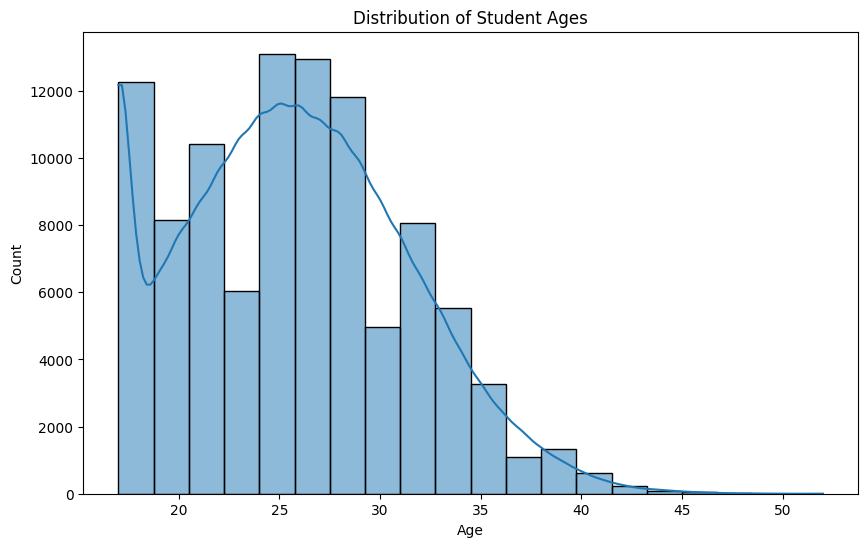

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Student Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


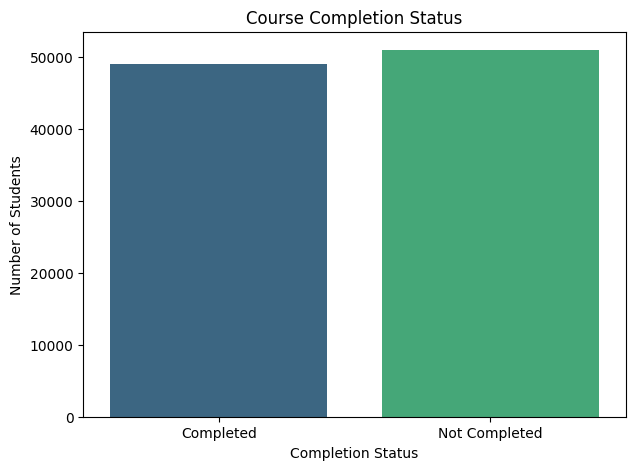

In [12]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Completed', data=df, hue='Completed', palette='viridis', legend=False)
plt.title('Course Completion Status')
plt.xlabel('Completion Status')
plt.ylabel('Number of Students')
plt.show()

## Analyze Numerical Feature Distributions


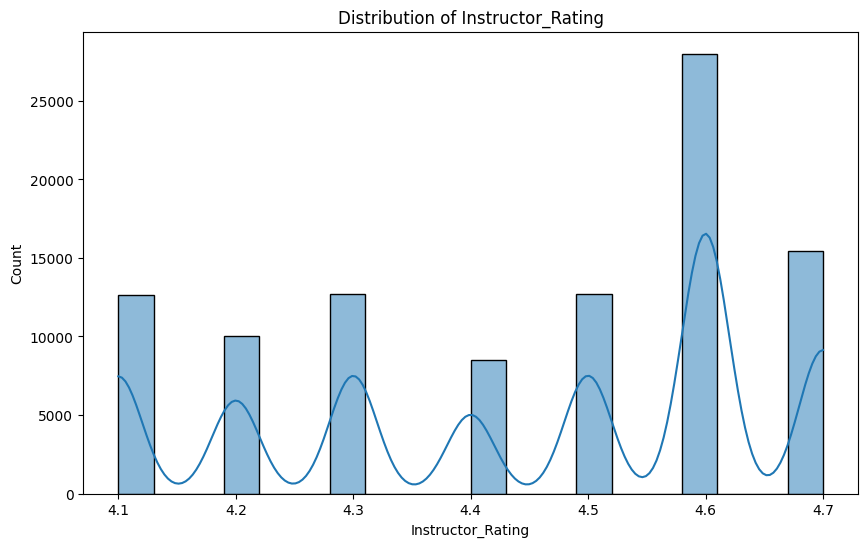

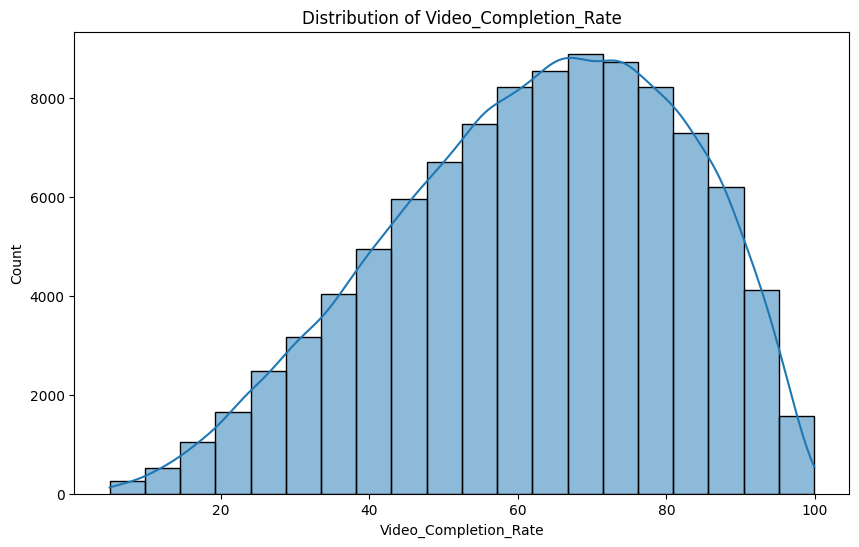

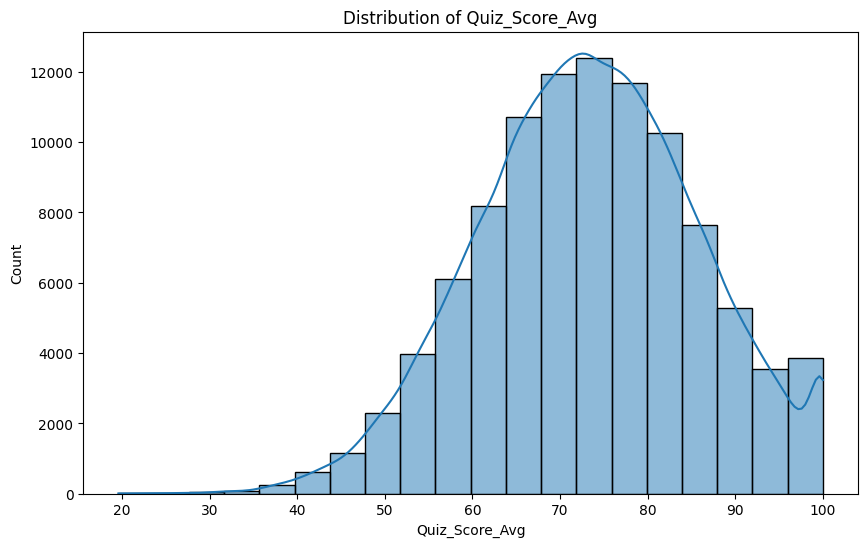

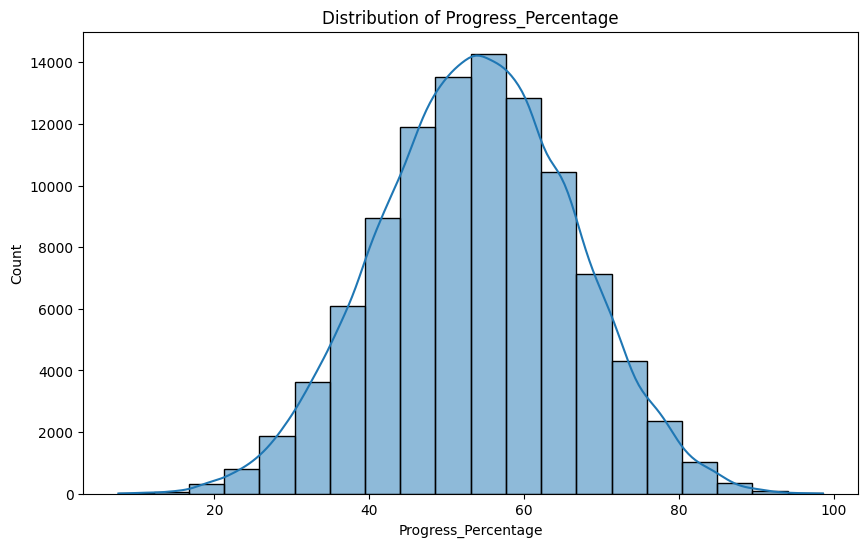

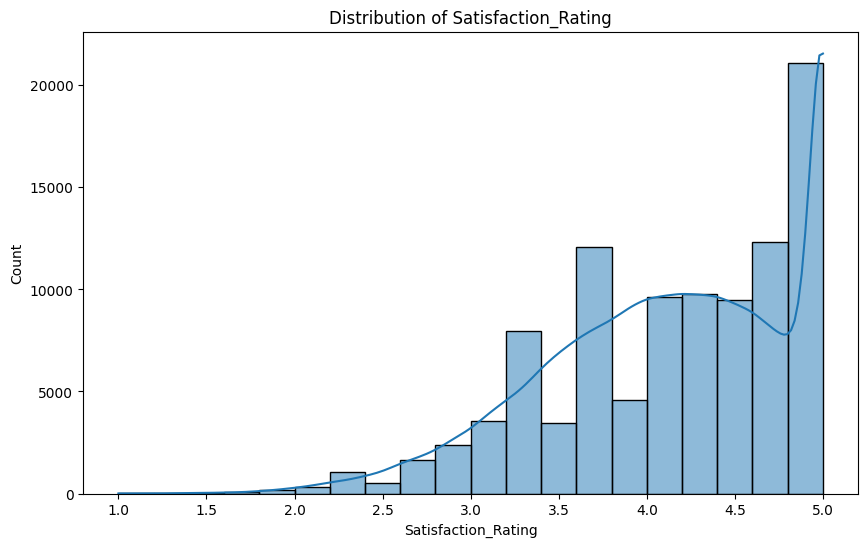

In [13]:
numerical_cols = ['Instructor_Rating', 'Video_Completion_Rate', 'Quiz_Score_Avg', 'Progress_Percentage', 'Satisfaction_Rating']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Analyze Categorical Feature Distributions


/tmp/ipython-input-164419797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


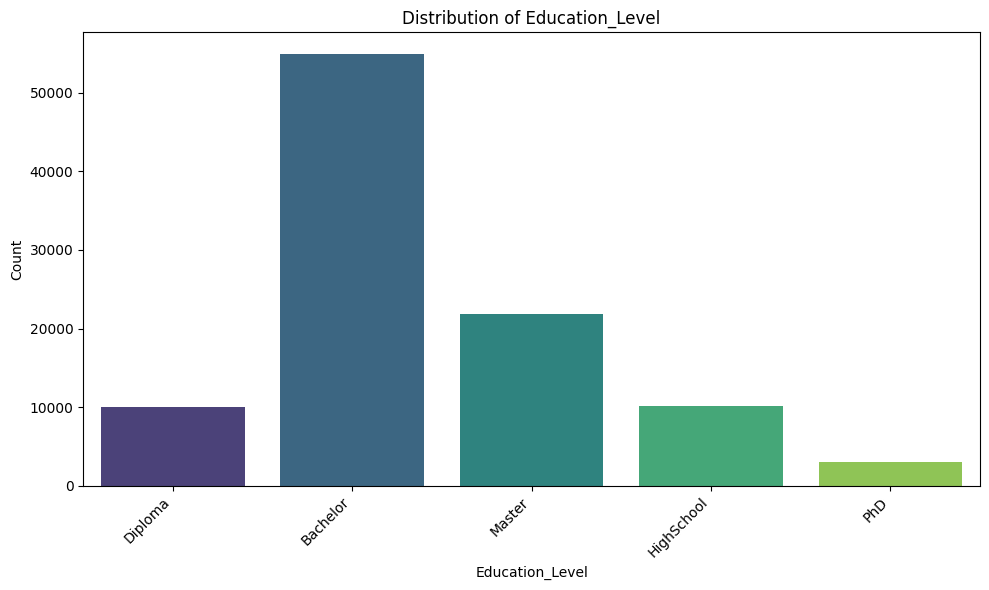

/tmp/ipython-input-164419797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


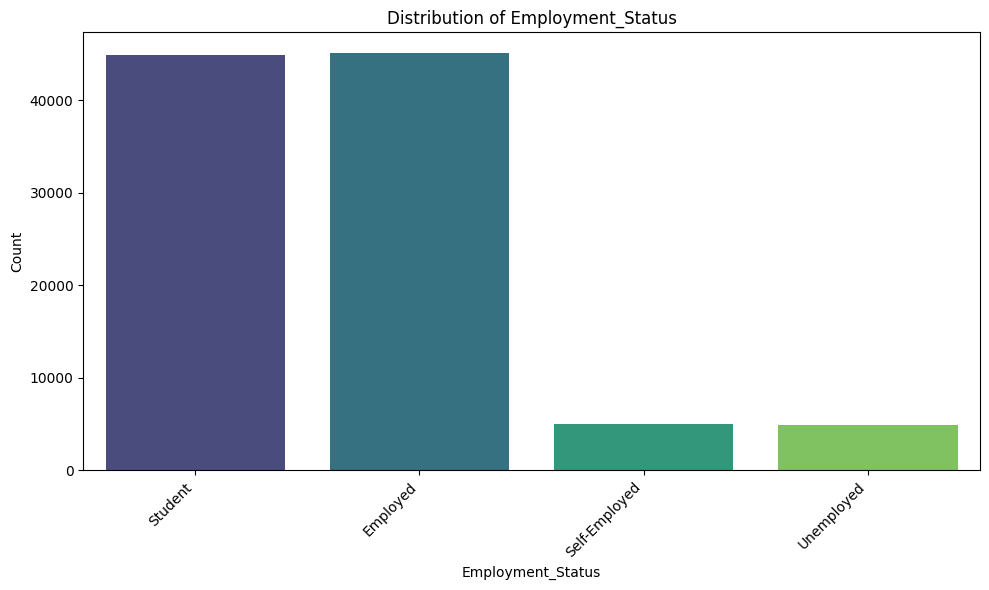

/tmp/ipython-input-164419797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


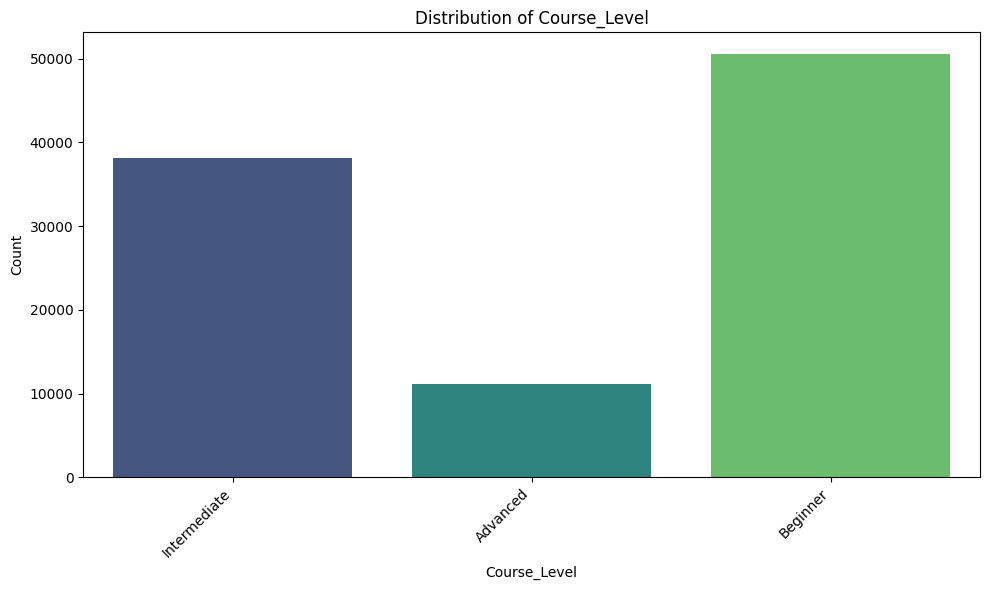

In [14]:
categorical_cols = ['Education_Level', 'Employment_Status', 'Course_Level']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

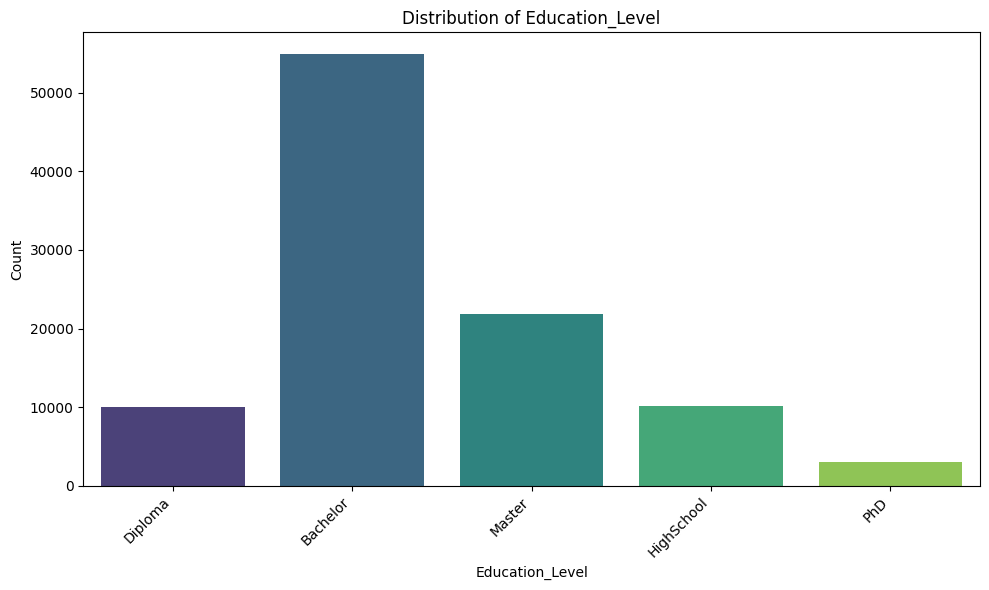

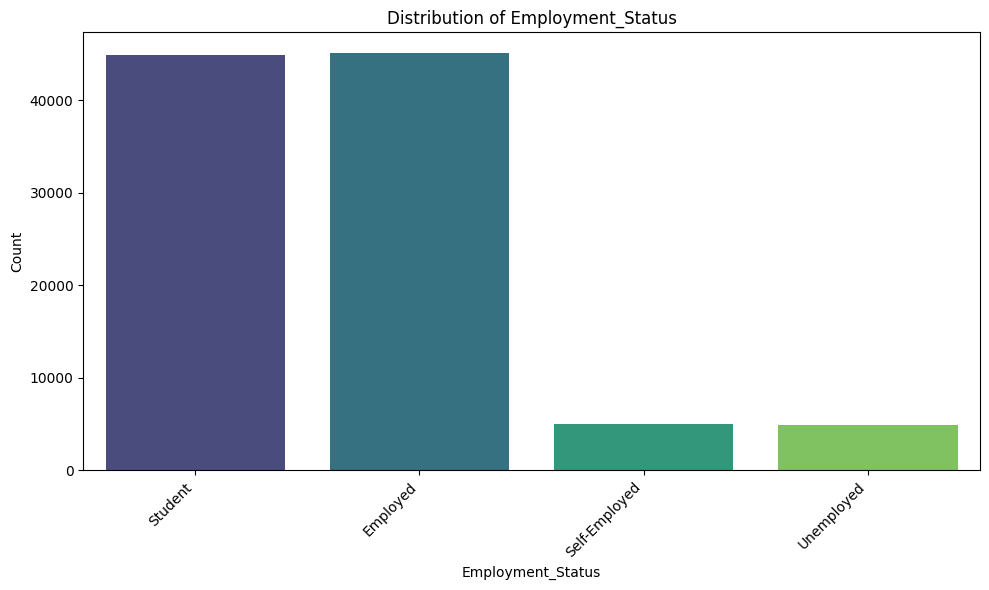

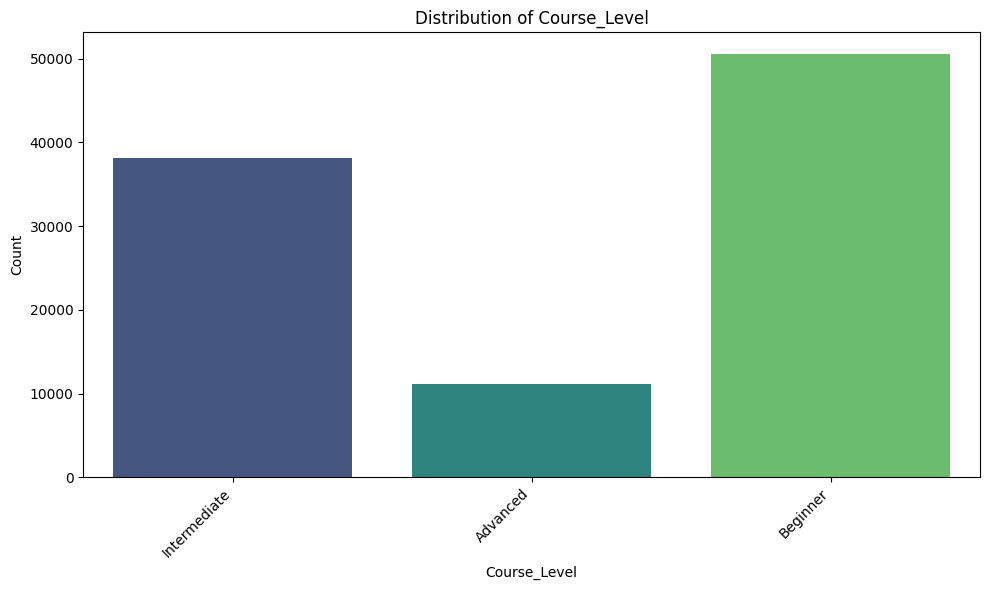

In [15]:
categorical_cols = ['Education_Level', 'Employment_Status', 'Course_Level']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Compare Numerical Features by Completion Status


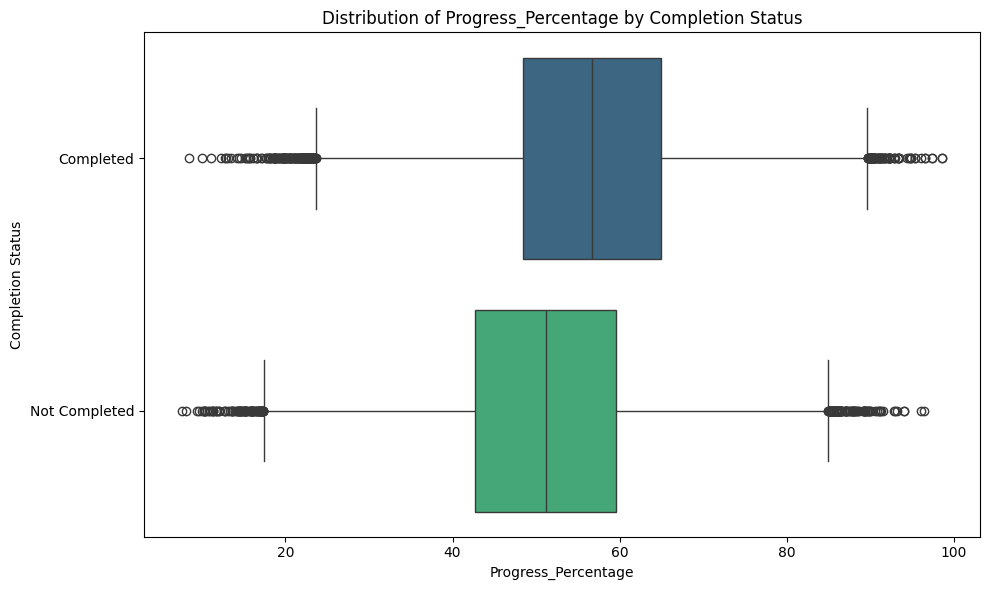

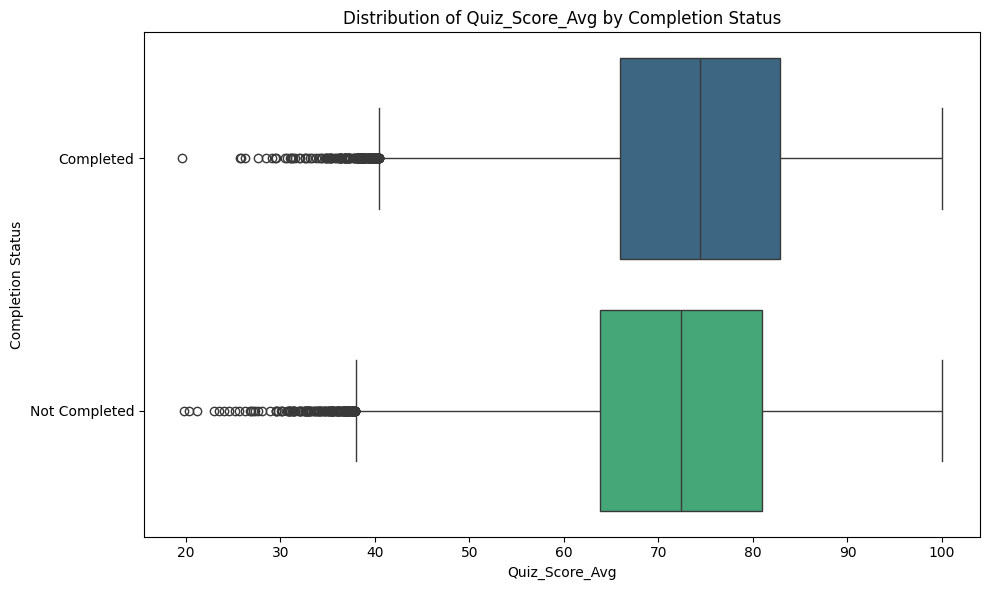

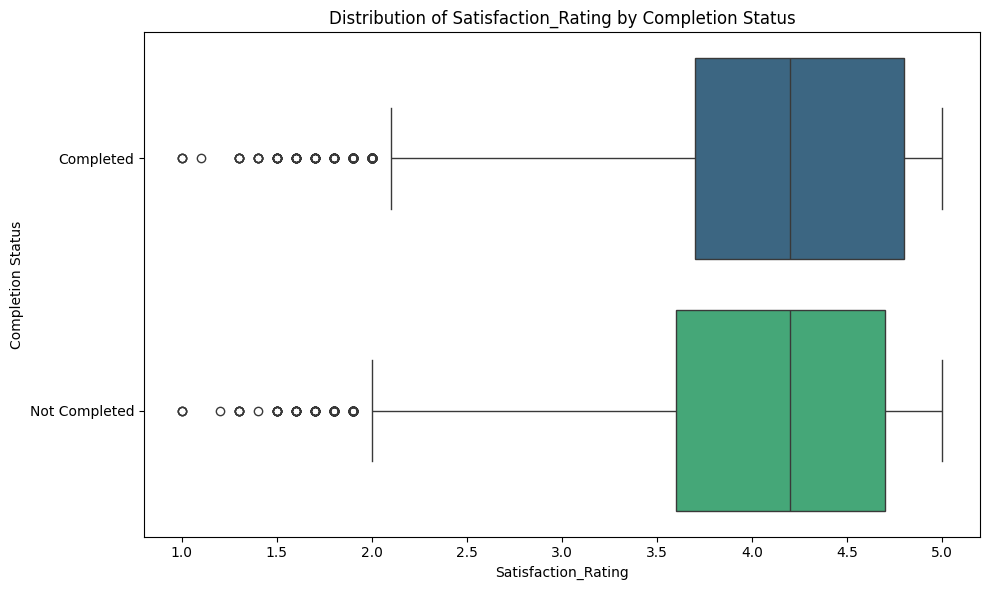

In [16]:
comparison_cols = ['Progress_Percentage', 'Quiz_Score_Avg', 'Satisfaction_Rating']

for col in comparison_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Completed', data=df, hue='Completed', palette='viridis', legend=False)
    plt.title(f'Distribution of {col} by Completion Status')
    plt.xlabel(col)
    plt.ylabel('Completion Status')
    plt.tight_layout()
    plt.show()

## Correlation Analysis


In [17]:
df['Completed_encoded'] = df['Completed'].map({'Completed': 1, 'Not Completed': 0})
print("Encoded 'Completed' column to 'Completed_encoded' (1 for Completed, 0 for Not Completed).")

Encoded 'Completed' column to 'Completed_encoded' (1 for Completed, 0 for Not Completed).


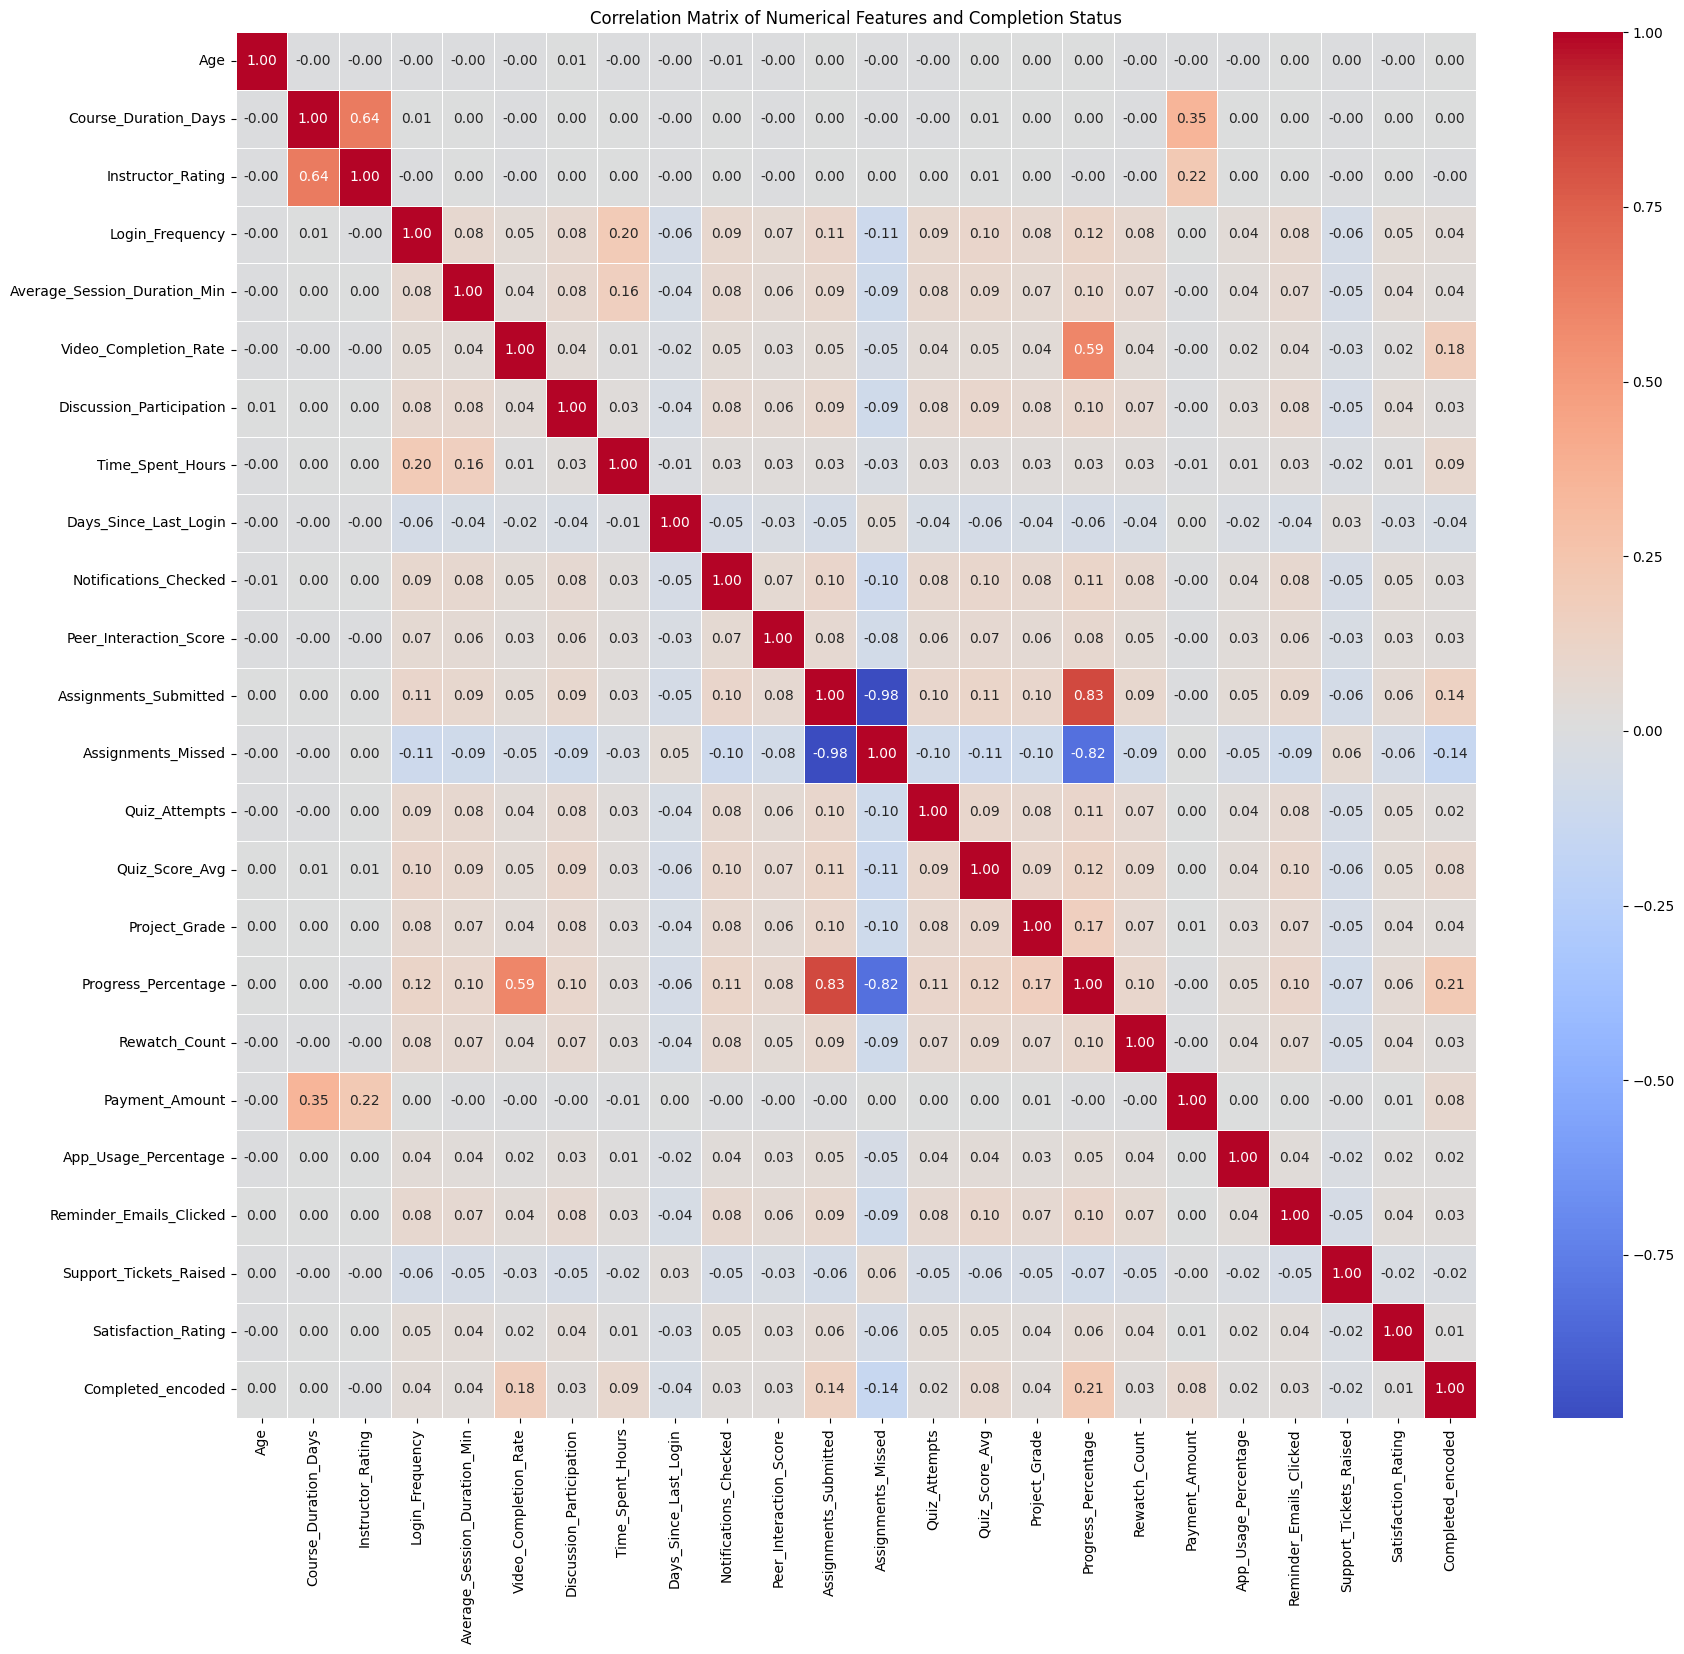

In [18]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features and Completion Status')
plt.show()

## Numerical Features vs. Completion


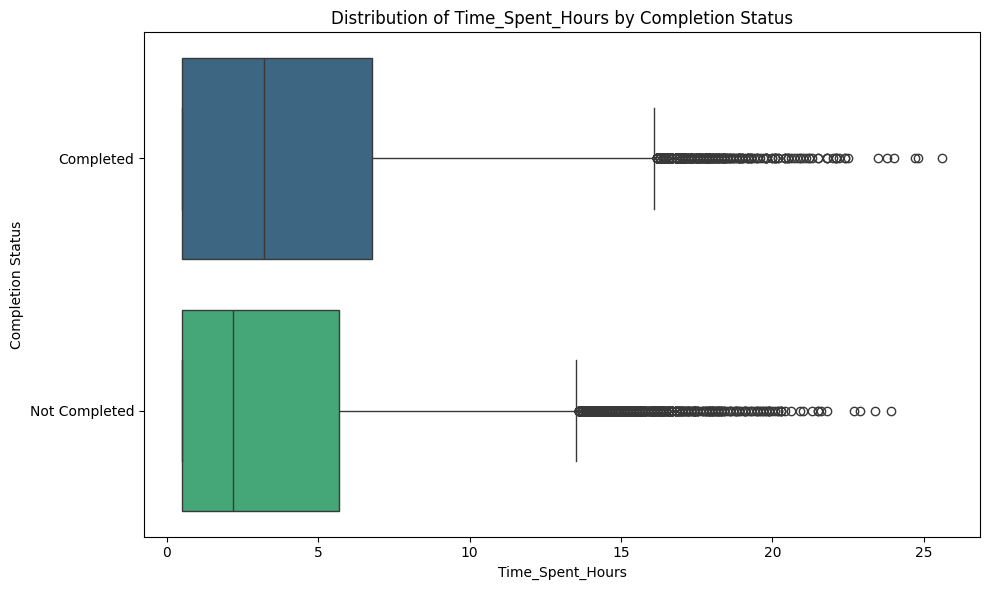

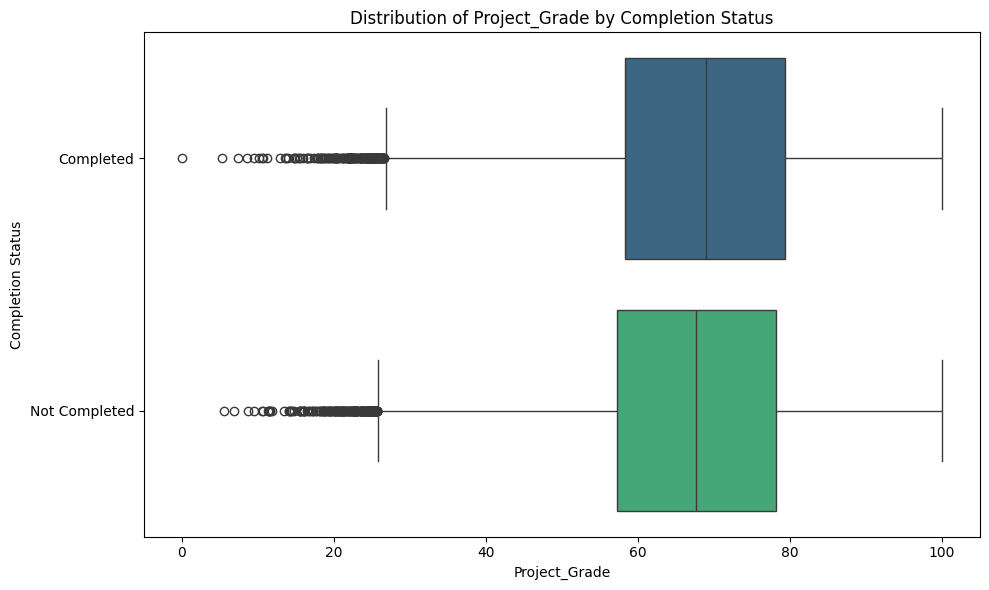

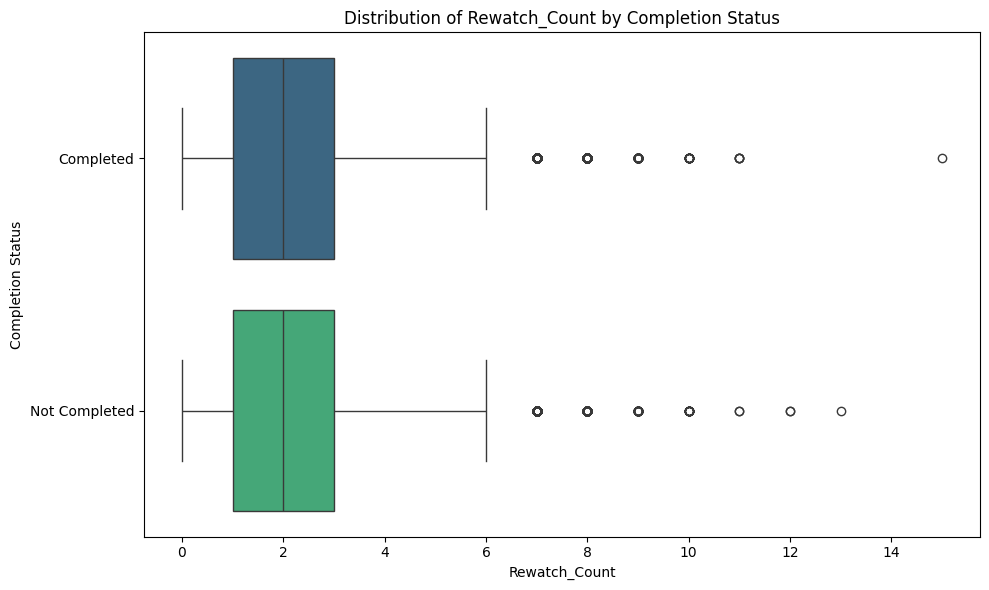

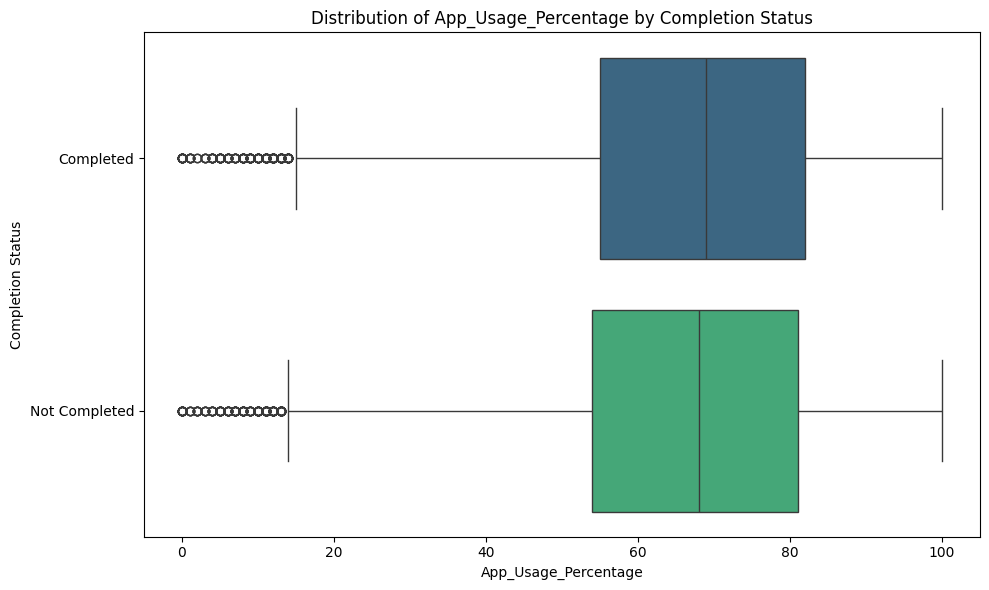

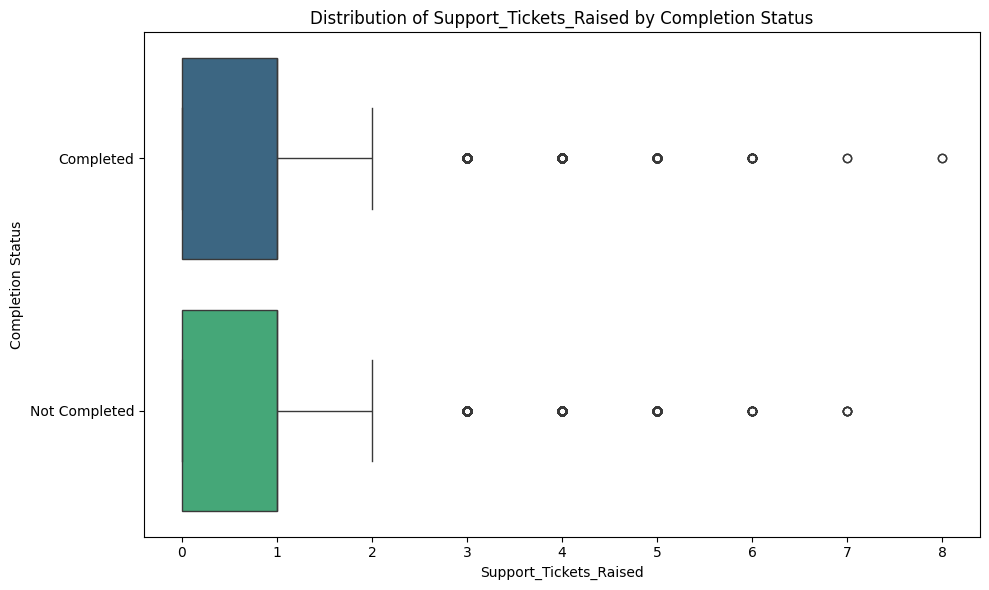

In [19]:
numerical_comparison_cols = ['Time_Spent_Hours', 'Project_Grade', 'Rewatch_Count', 'App_Usage_Percentage', 'Support_Tickets_Raised']

for col in numerical_comparison_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Completed', data=df, hue='Completed', palette='viridis', legend=False)
    plt.title(f'Distribution of {col} by Completion Status')
    plt.xlabel(col)
    plt.ylabel('Completion Status')
    plt.tight_layout()
    plt.show()

## Categorical Features vs. Completion


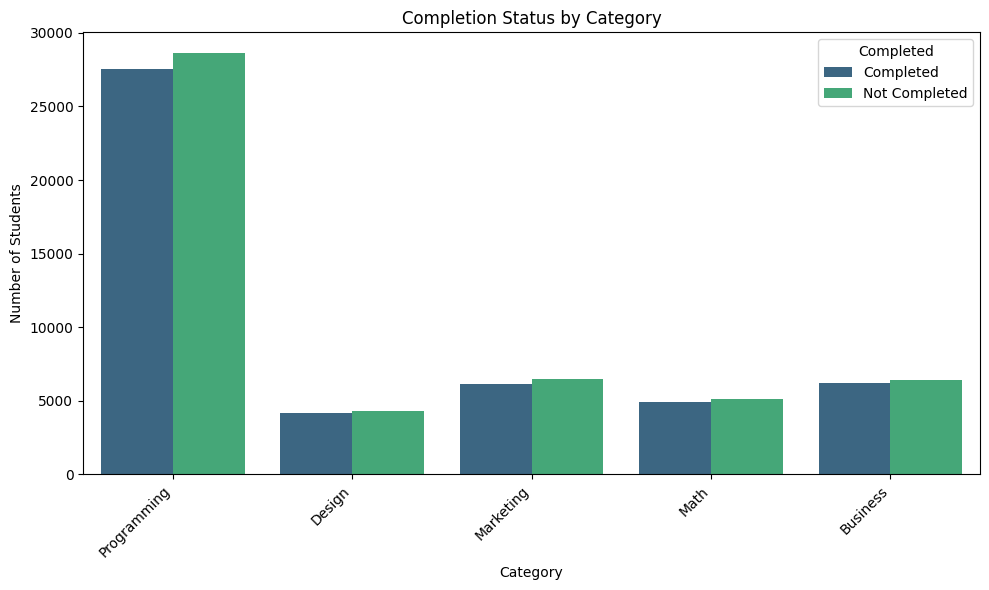

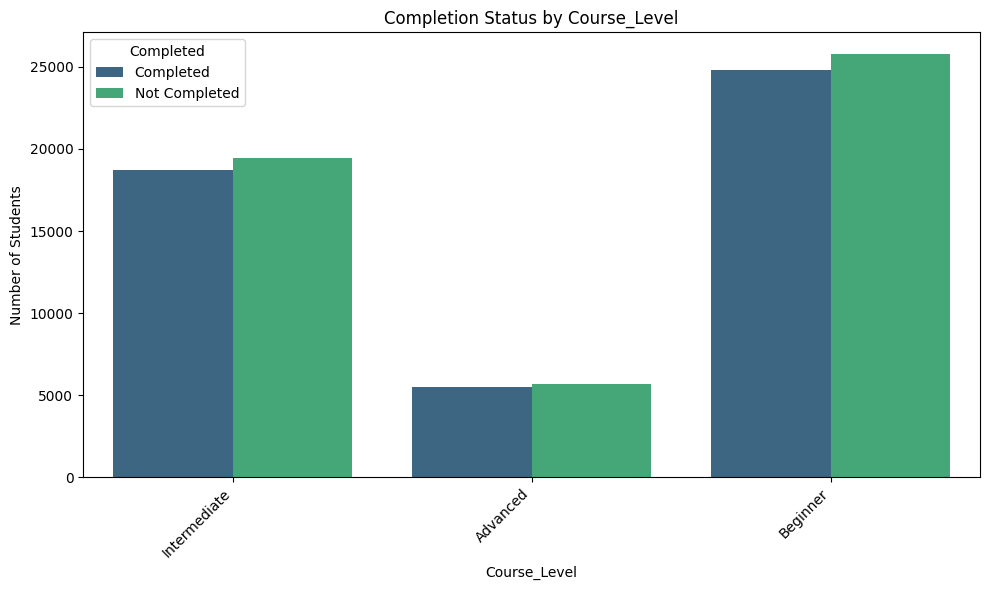

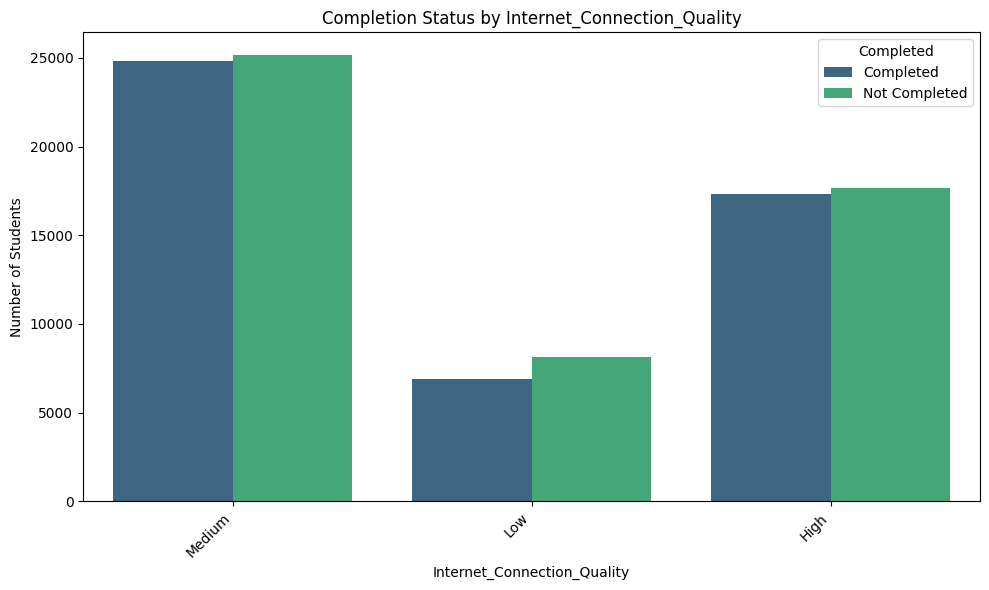

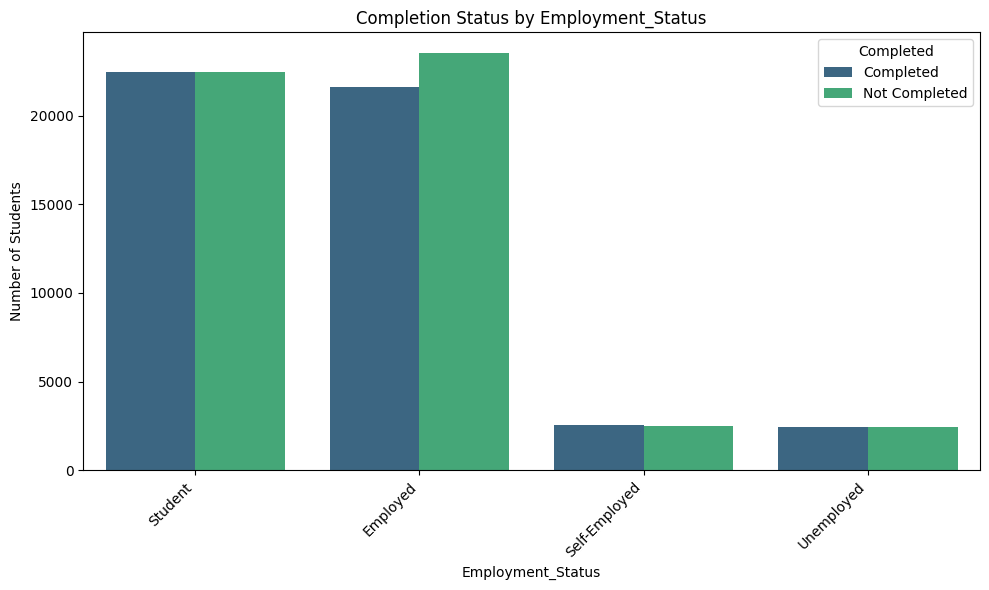

In [20]:
categorical_comparison_cols = ['Category', 'Course_Level', 'Internet_Connection_Quality', 'Employment_Status']

for col in categorical_comparison_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Completed', data=df, palette='viridis')
    plt.title(f'Completion Status by {col}')
    plt.xlabel(col)
    plt.ylabel('Number of Students')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Completed')
    plt.tight_layout()
    plt.show()

## Explain Simpson's Paradox


### What is Simpson's Paradox?

Simpson's Paradox is a phenomenon in probability and statistics where a trend appears in several different groups of data but disappears or reverses when these groups are combined. This can occur when there's a lurking variable (a confounding variable) that is not accounted for, which influences both the grouping and the outcome being measured.

### Why is it important to be aware of Simpson's Paradox in data analysis?

Being aware of Simpson's Paradox is crucial in data analysis because failing to recognize it can lead to incorrect or misleading conclusions. If a researcher combines data from different subgroups without considering potential confounding factors, they might observe a trend that is not truly representative of the underlying relationships. This can result in poor decision-making, misinterpretation of causal effects, and flawed policies or strategies based on incomplete or aggregated information. It underscores the importance of examining data at multiple levels of aggregation and considering all relevant variables before drawing conclusions.

## Generate Synthetic Data for Paradox



In [21]:
np.random.seed(42)

# Group A
x_a = np.random.uniform(0, 50, 100)
y_a = 0.5 * x_a + np.random.normal(0, 5, 100)
group_a = ['A'] * 100

# Group B
x_b = np.random.uniform(50, 100, 100)
y_b = 0.5 * x_b + 5 + np.random.normal(0, 5, 100)
group_b = ['B'] * 100

# Combine data into a DataFrame
df_paradox = pd.DataFrame({
    'x': np.concatenate([x_a, x_b]),
    'y': np.concatenate([y_a, y_b]),
    'group': np.concatenate([group_a, group_b])
})

print("Synthetic DataFrame created:")
print(df_paradox.head())

Synthetic DataFrame created:
           x          y group
0  18.727006   9.798738     A
1  47.535715  22.272821     A
2  36.599697  18.758652     A
3  29.932924   5.028618     A
4   7.800932   2.802107     A


## Visualize Subgroup Trends



<Figure size 1000x700 with 0 Axes>

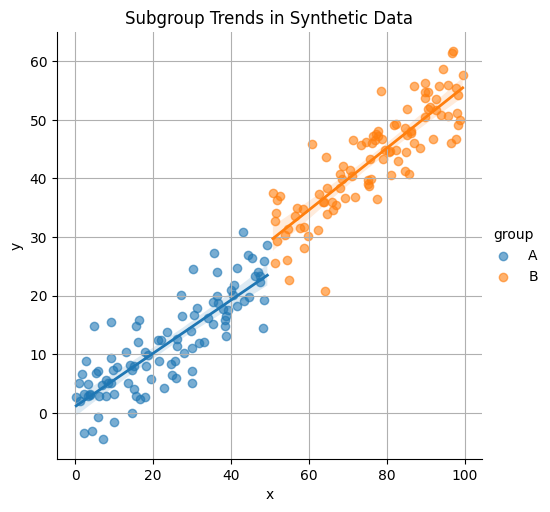

In [22]:
plt.figure(figsize=(10, 7))
sns.lmplot(data=df_paradox, x='x', y='y', hue='group', scatter_kws={'alpha':0.6}, line_kws={'lw':2})
plt.title('Subgroup Trends in Synthetic Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

<Figure size 1000x700 with 0 Axes>

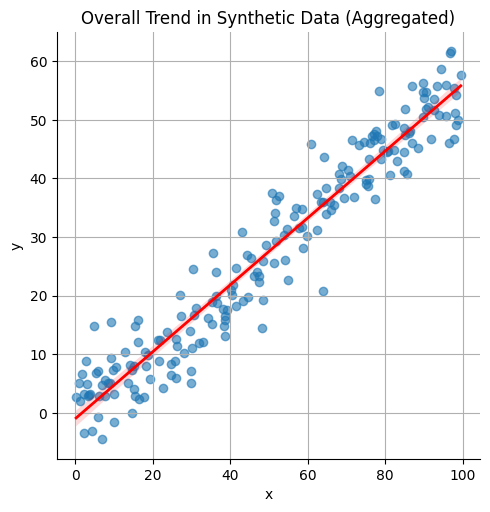

In [23]:
plt.figure(figsize=(10, 7))
sns.lmplot(data=df_paradox, x='x', y='y', scatter_kws={'alpha':0.6}, line_kws={'lw':2, 'color':'red'})
plt.title('Overall Trend in Synthetic Data (Aggregated)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## Discuss the Visual Demonstration


### Visual Demonstration of Simpson's Paradox

The two plots generated above visually demonstrate Simpson's Paradox.

1.  **'Subgroup Trends in Synthetic Data' Plot:**
    *   **Group A (blue points and line):** Within Group A, as 'x' increases, 'y' generally increases. This shows a clear positive correlation or upward trend for Group A.
    *   **Group B (orange points and line):** Similarly, within Group B, as 'x' increases, 'y' also generally increases. This indicates a positive correlation or upward trend for Group B as well.

    In both individual subgroups, the trend lines are upward sloping, suggesting a positive relationship between 'x' and 'y'.

2.  **'Overall Trend in Synthetic Data (Aggregated)' Plot:**
    *   When all the data points from both Group A and Group B are combined and a single regression line is fitted (the red line), the overall trend is downward sloping. This suggests a negative correlation between 'x' and 'y' for the aggregated data.

### The Paradox

Simpson's Paradox is evident here because the trend observed within each subgroup (positive correlation) is reversed when the data from both groups are combined (negative correlation). Even though 'x' and 'y' have a positive relationship in both Group A and Group B individually, the aggregated data shows a negative relationship. This occurs because the 'group' variable itself acts as a confounding factor; Group A generally has lower 'x' values and lower 'y' values, while Group B has higher 'x' values and higher 'y' values (due to the added constant in the generation of y_b). When combined, this structural difference between the groups masks the within-group positive correlations and creates an artificial negative overall correlation.

## Identify Potential Simpson's Paradox Variables



### Explanation for Variable Selection to Demonstrate Simpson's Paradox

To effectively demonstrate Simpson's Paradox within the `df` dataset, we need to select variables that allow for observing a trend that can be reversed or altered when a confounding categorical variable is introduced. The chosen variables are `Progress_Percentage`, `Completed_encoded`, and `Education_Level`.

1.  **`Progress_Percentage` (Numerical) and `Completed_encoded` (Binary/Numerical Outcome):**
    *   `Progress_Percentage` is a numerical variable representing the percentage of a course completed. It ranges from 0 to 100, providing a continuous scale to observe a relationship. This makes it an ideal independent variable for a correlation or regression analysis.
    *   `Completed_encoded` is a numerical representation (1 for 'Completed', 0 for 'Not Completed') of the course completion status. This binary outcome is suitable as the dependent variable, allowing us to examine how changes in `Progress_Percentage` relate to the likelihood of course completion.
    *   The natural expectation is that a higher `Progress_Percentage` would correlate positively with `Completed_encoded` (i.e., higher progress means higher likelihood of completion). This relationship forms the basis for observing a trend.

2.  **`Education_Level` (Categorical) as a Grouping Variable:**
    *   `Education_Level` is a categorical variable with distinct categories such as 'Diploma', 'Bachelor', 'Master', etc. This makes it an excellent candidate for a grouping variable.
    *   Different educational backgrounds might influence how students approach and complete courses. For instance, students with a Master's degree might have different learning strategies, prior knowledge, or time commitments compared to those with a Diploma. These differences could impact their `Progress_Percentage` and ultimately `Completed_encoded`.
    *   By disaggregating the data by `Education_Level`, we can analyze the relationship between `Progress_Percentage` and `Completed_encoded` within each educational group. It is plausible that within certain educational levels, a different trend emerges than what is observed when all educational levels are aggregated. For example, some education levels might show a stronger positive correlation, while others might appear weaker, and when combined, these nuances could lead to an overall misleading trend, thus demonstrating Simpson's Paradox.

In summary, `Progress_Percentage` and `Completed_encoded` are chosen to establish an observable trend of how progress relates to completion, while `Education_Level` is selected as the categorical variable that can potentially confound this relationship, revealing different trends when data is grouped by education level versus when it's aggregated.

## Visualize Subgroup Trends in 'df'



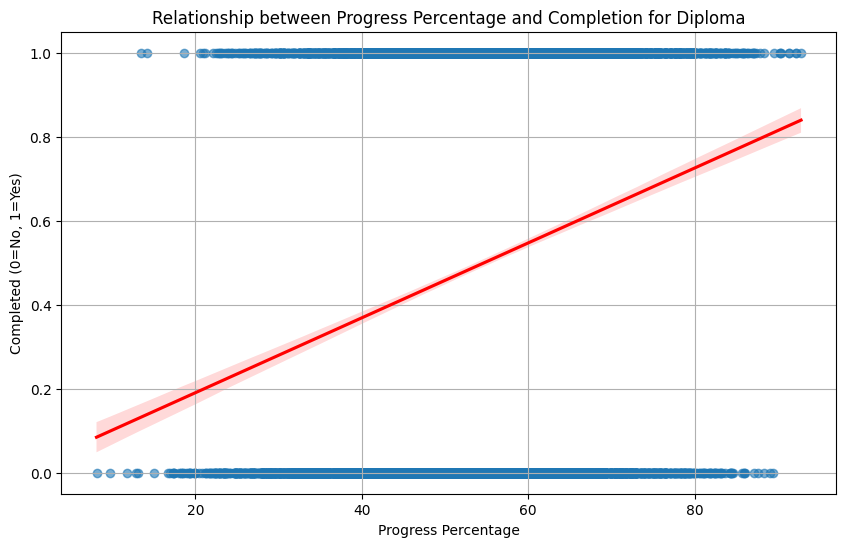

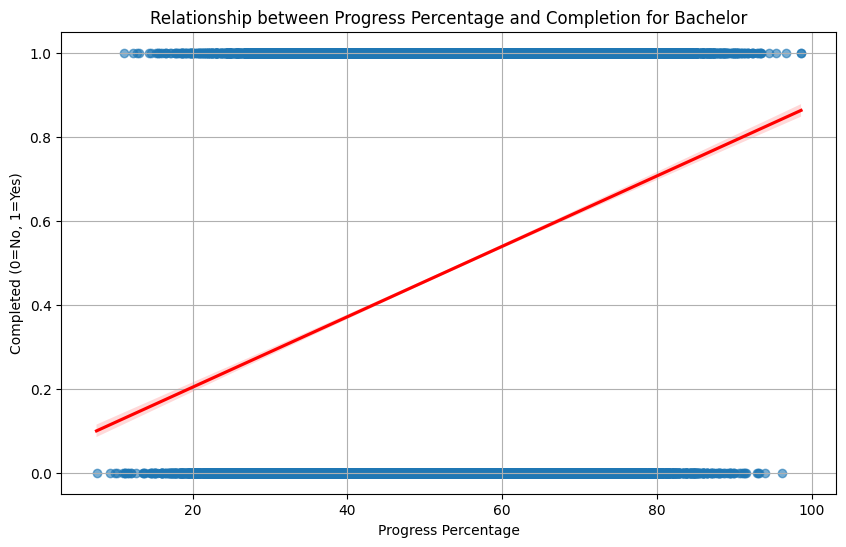

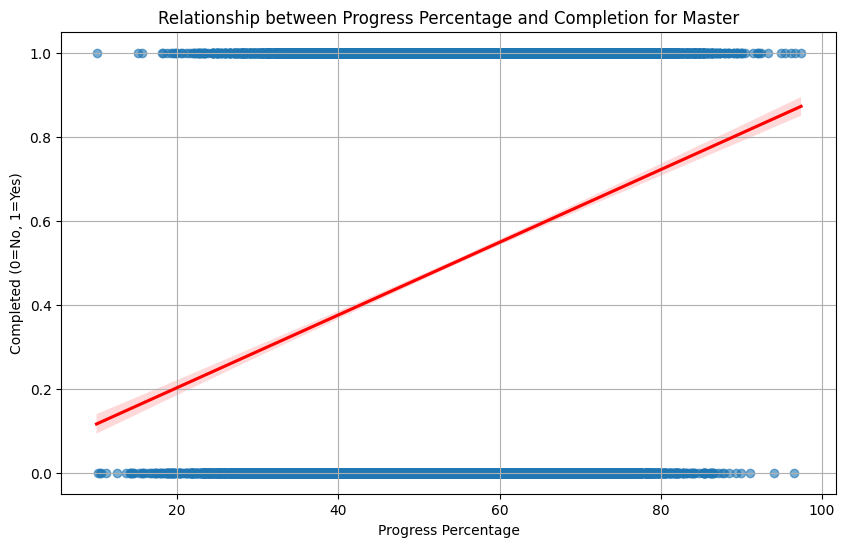

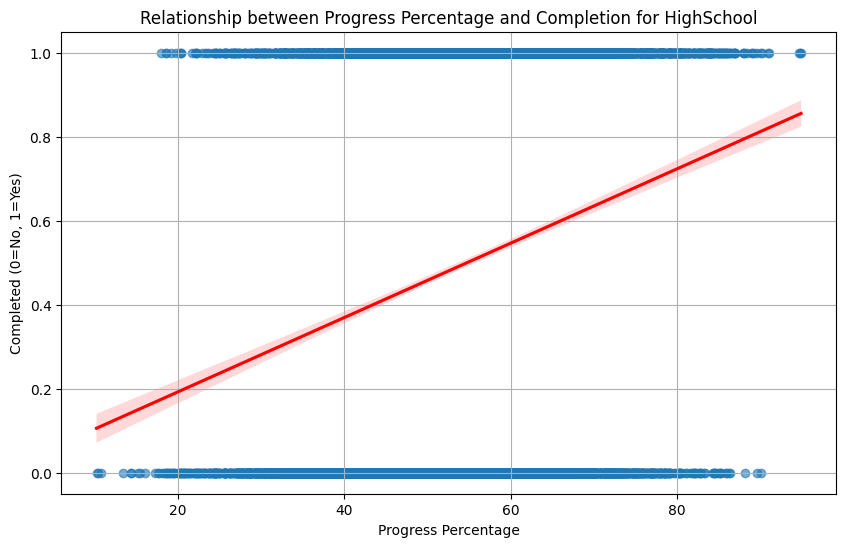

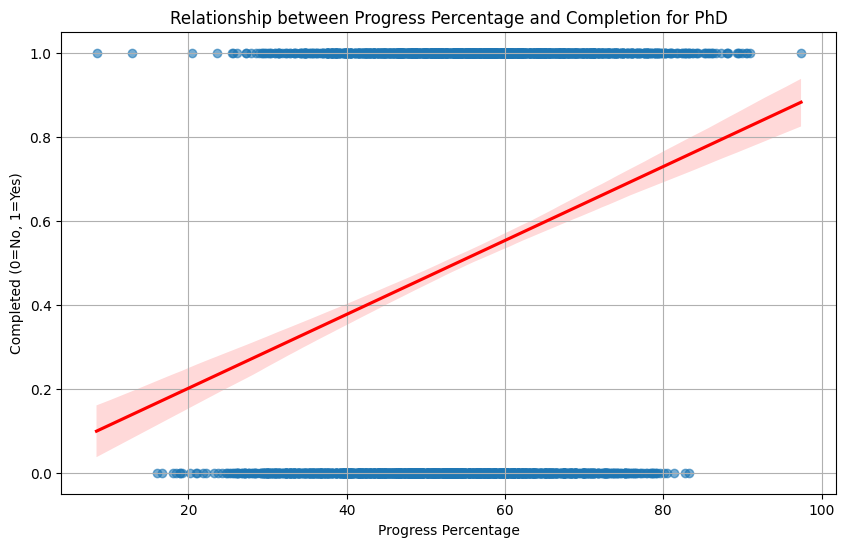

In [24]:
education_levels = df['Education_Level'].unique()

for level in education_levels:
    subgroup_df = df[df['Education_Level'] == level]
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Progress_Percentage', y='Completed_encoded', data=subgroup_df,
                scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'Relationship between Progress Percentage and Completion for {level}')
    plt.xlabel('Progress Percentage')
    plt.ylabel('Completed (0=No, 1=Yes)')
    plt.grid(True)
    plt.show()

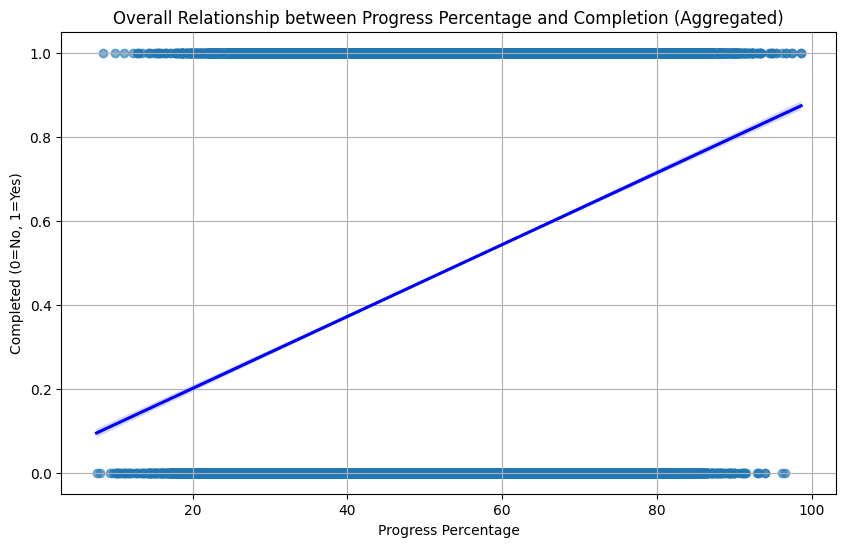

In [25]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Progress_Percentage', y='Completed_encoded', data=df,
            scatter_kws={'alpha':0.6}, line_kws={'color':'blue'})
plt.title('Overall Relationship between Progress Percentage and Completion (Aggregated)')
plt.xlabel('Progress Percentage')
plt.ylabel('Completed (0=No, 1=Yes)')
plt.grid(True)
plt.show()

## **There is No Simpson's Paradox in this dataset for the relationship between Progress_Percentage and Completed_encoded when considering Education_Level as a grouping variable. The trends within each educational subgroup and the overall aggregated trend both consistently showed a positive correlation.**

## Prepare Data for Dimensionality Reduction

In [26]:
numerical_cols_for_dr = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude 'Completed_encoded' from the features for DR
if 'Completed_encoded' in numerical_cols_for_dr:
    numerical_cols_for_dr.remove('Completed_encoded')

# Assuming 'Student_ID' and 'Name' are not numerical, but if they were for some reason
# and mistakenly included, they would also need to be excluded. However, df.select_dtypes
# handles this implicitly.

features_df = df[numerical_cols_for_dr].copy()

print(f"Selected {len(features_df.columns)} numerical features for dimensionality reduction.")
print("First 5 rows of features_df:")
print(features_df.head())

Selected 23 numerical features for dimensionality reduction.
First 5 rows of features_df:
   Age  Course_Duration_Days  Instructor_Rating  Login_Frequency  \
0   19                    60                4.7                3   
1   17                    90                4.6                4   
2   34                    45                4.6                5   
3   29                    40                4.4                2   
4   19                    90                4.6                2   

   Average_Session_Duration_Min  Video_Completion_Rate  \
0                            30                   55.0   
1                            37                   84.1   
2                             9                   75.6   
3                            27                   63.3   
4                            36                   86.4   

   Discussion_Participation  Time_Spent_Hours  Days_Since_Last_Login  \
0                         2               0.5                      1   
1       

In [27]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply scaler to features_df
scaled_features = scaler.fit_transform(features_df)

# Create a new DataFrame with scaled features, retaining column names
scaled_features_df = pd.DataFrame(scaled_features, columns=features_df.columns)

print("Scaled features DataFrame created. First 5 rows:")
print(scaled_features_df.head())

# Define SPECIES_NAMES and SPECIES_COLORS for visualization
SPECIES_NAMES = {
    0: 'Not Completed',
    1: 'Completed'
}

SPECIES_COLORS = {
    'Not Completed': '#1f77b4', # A shade of blue
    'Completed': '#ff7f0e'      # A shade of orange
}

print("SPECIES_NAMES and SPECIES_COLORS defined.")

Scaled features DataFrame created. First 5 rows:
        Age  Course_Duration_Days  Instructor_Rating  Login_Frequency  \
0 -1.194884              0.402599           1.261028        -0.965968   
1 -1.551056              1.878635           0.767517        -0.424925   
2  1.476406             -0.335419           0.767517         0.116119   
3  0.585976             -0.581426          -0.219504        -1.507012   
4 -1.194884              1.878635           0.767517        -1.507012   

   Average_Session_Duration_Min  Video_Completion_Rate  \
0                     -0.374996              -0.366836   
1                      0.301861               1.121044   
2                     -2.405569               0.686440   
3                     -0.665078               0.057543   
4                      0.205167               1.238643   

   Discussion_Participation  Time_Spent_Hours  Days_Since_Last_Login  \
0                 -0.206924         -0.892220              -0.743175   
1                 -

## Perform and Visualize PCA (2D Projection)


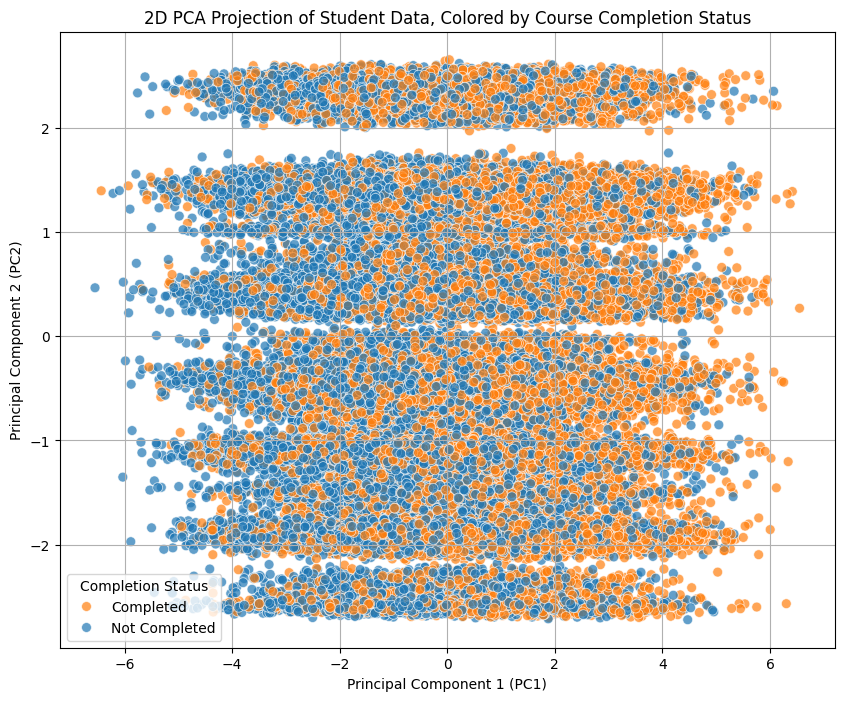

In [28]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled data
pca_components = pca.fit_transform(scaled_features_df)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Add the 'Completed_encoded' column from the original df to the pca_df
pca_df['Completed_encoded'] = df['Completed_encoded']

# Map the encoded values back to descriptive names for plotting
pca_df['Completion_Status'] = pca_df['Completed_encoded'].map(SPECIES_NAMES)

# Plot the 2D PCA projection
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Completion_Status',
    palette=SPECIES_COLORS,
    data=pca_df,
    s=50, # size of points
    alpha=0.7 # transparency
)
plt.title('2D PCA Projection of Student Data, Colored by Course Completion Status')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.legend(title='Completion Status')
plt.show()

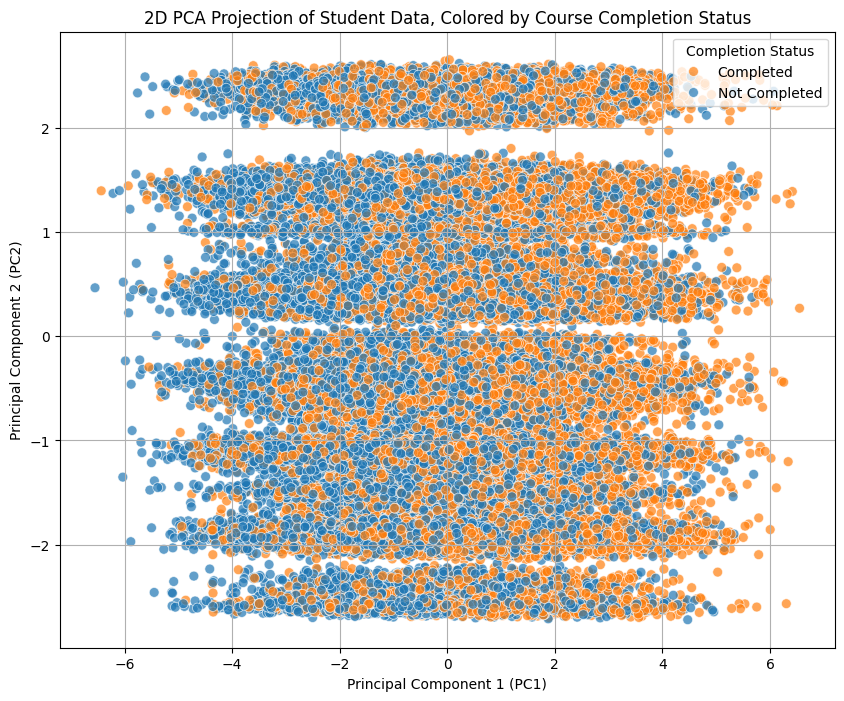

In [29]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled data
pca_components = pca.fit_transform(scaled_features_df)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Add the 'Completed_encoded' column from the original df to the pca_df
pca_df['Completed_encoded'] = df['Completed_encoded']

# Map the encoded values back to descriptive names for plotting
pca_df['Completion_Status'] = pca_df['Completed_encoded'].map(SPECIES_NAMES)

# Plot the 2D PCA projection
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Completion_Status',
    palette=SPECIES_COLORS,
    data=pca_df,
    s=50, # size of points
    alpha=0.7 # transparency
)
plt.title('2D PCA Projection of Student Data, Colored by Course Completion Status')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.legend(title='Completion Status', loc='upper right') # Explicitly setting legend location
plt.show()

## Visualize PCA Explained Variance


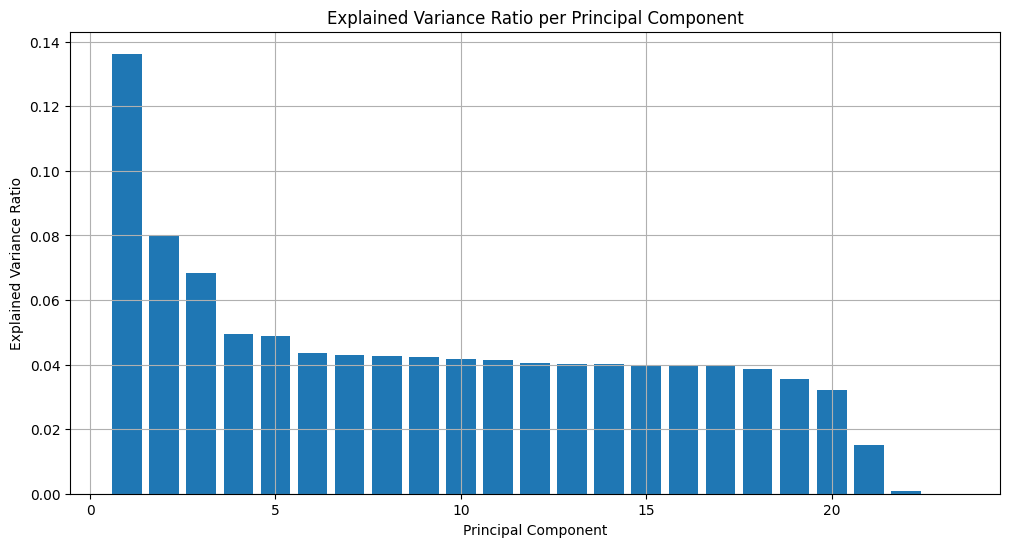

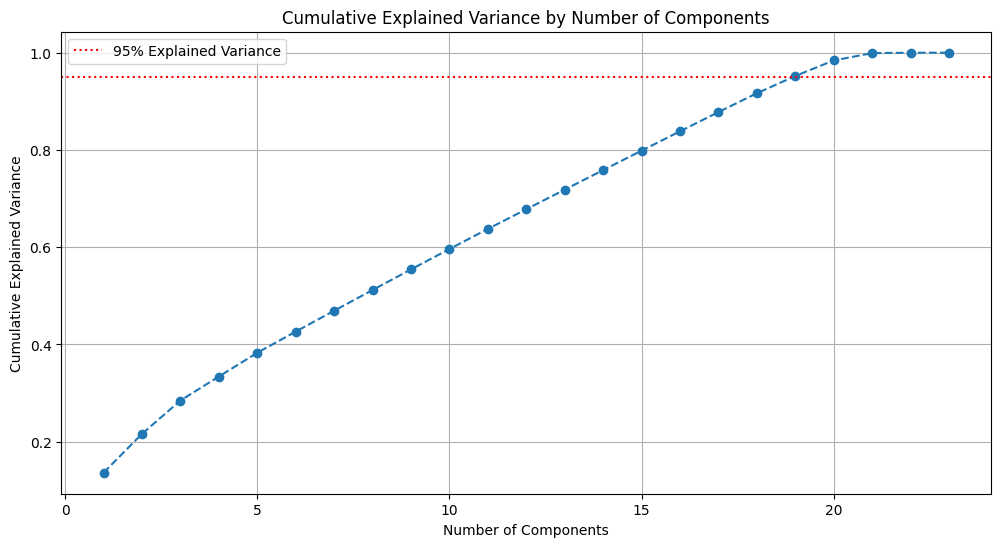

In [30]:
from sklearn.decomposition import PCA

# Instantiate PCA with all components
pca_full = PCA(n_components=None)

# Fit the PCA model to the scaled data
pca_full.fit(scaled_features_df)

# Get explained variance ratio and cumulative explained variance
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio for each principal component
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.title('Explained Variance Ratio per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

## Visualize PCA Feature Loadings



In [31]:
feature_loadings = pd.DataFrame(pca_full.components_[:2].T,
                                  columns=['PC1', 'PC2'],
                                  index=scaled_features_df.columns)

print("Feature loadings DataFrame created for PC1 and PC2:")
print(feature_loadings.head())

Feature loadings DataFrame created for PC1 and PC2:
                                   PC1       PC2
Age                           0.001526 -0.004868
Course_Duration_Days          0.002357  0.653806
Instructor_Rating             0.001607  0.615866
Login_Frequency               0.141989  0.010336
Average_Session_Duration_Min  0.121456  0.005824


/tmp/ipython-input-213389569.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pc1_plot_data.index, y=pc1_plot_data.values, palette='coolwarm')


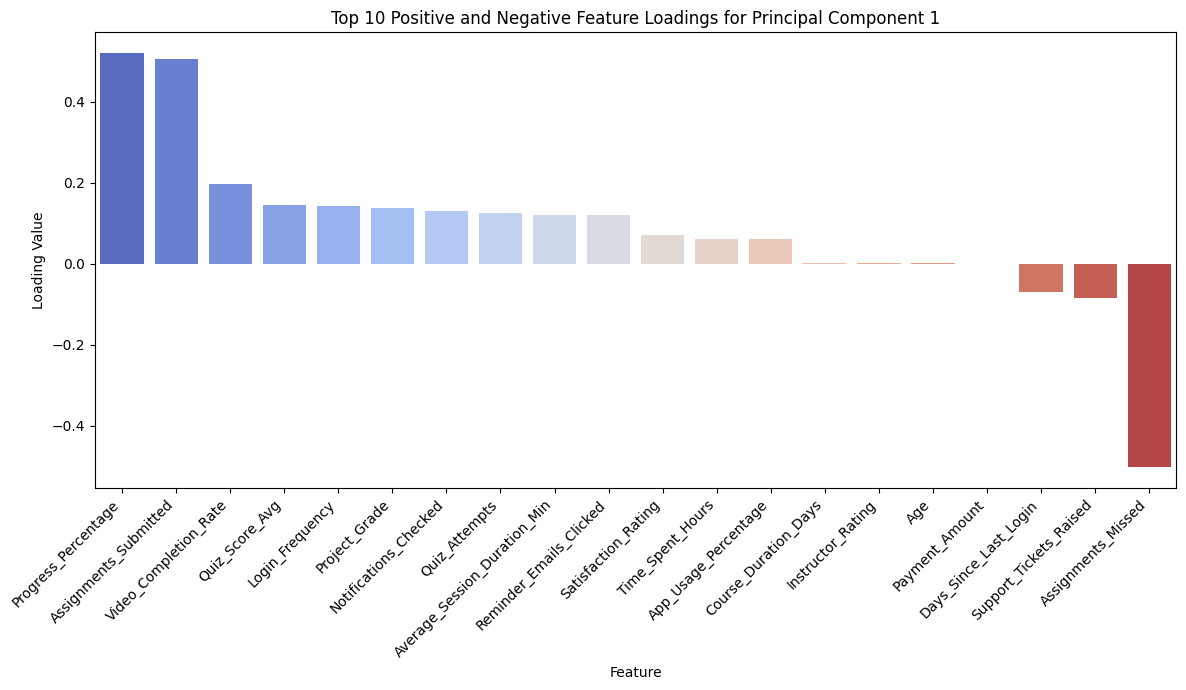

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort loadings for PC1
pc1_loadings_sorted = feature_loadings['PC1'].sort_values(ascending=False)

# Get top 10 positive and top 10 negative loadings for PC1
top_10_pos_pc1 = pc1_loadings_sorted.head(10)
top_10_neg_pc1 = pc1_loadings_sorted.tail(10)

# Combine for plotting
pc1_plot_data = pd.concat([top_10_pos_pc1, top_10_neg_pc1])

plt.figure(figsize=(12, 7))
sns.barplot(x=pc1_plot_data.index, y=pc1_plot_data.values, palette='coolwarm')
plt.title('Top 10 Positive and Negative Feature Loadings for Principal Component 1')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-273002638.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pc1_plot_data.index, y=pc1_plot_data.values, palette='coolwarm', legend=False)


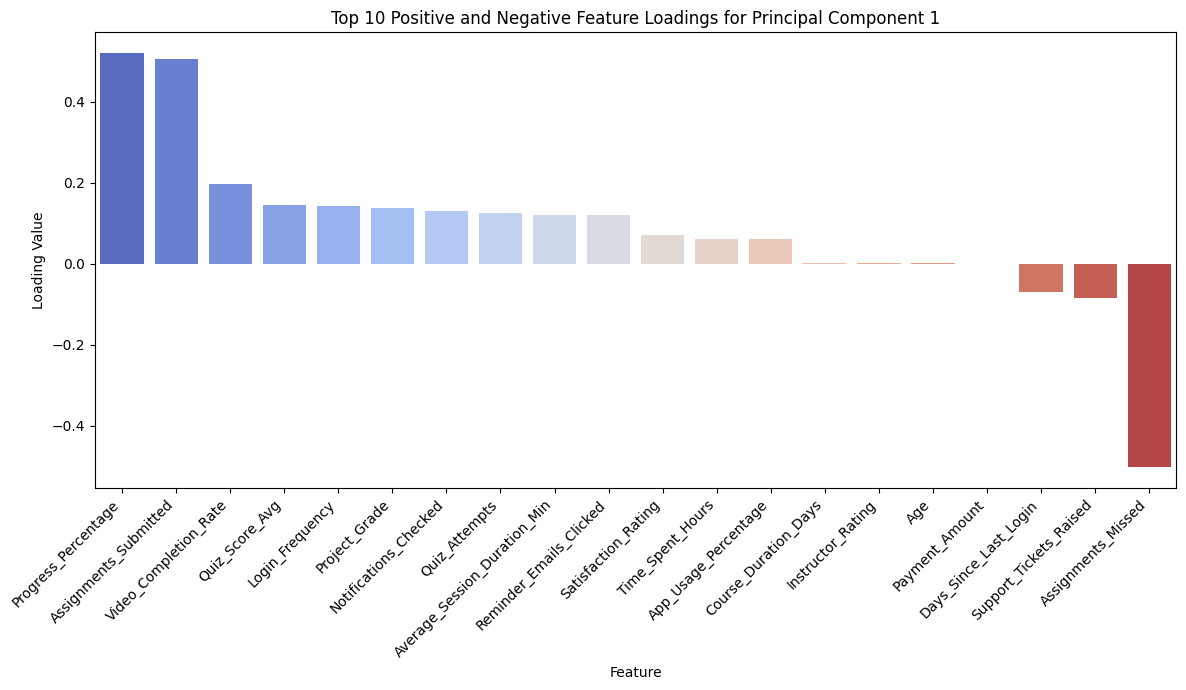

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort loadings for PC1
pc1_loadings_sorted = feature_loadings['PC1'].sort_values(ascending=False)

# Get top 10 positive and top 10 negative loadings for PC1
top_10_pos_pc1 = pc1_loadings_sorted.head(10)
top_10_neg_pc1 = pc1_loadings_sorted.tail(10)

# Combine for plotting
pc1_plot_data = pd.concat([top_10_pos_pc1, top_10_neg_pc1])

plt.figure(figsize=(12, 7))
sns.barplot(x=pc1_plot_data.index, y=pc1_plot_data.values, palette='coolwarm', legend=False)
plt.title('Top 10 Positive and Negative Feature Loadings for Principal Component 1')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Now, I will sort the feature loadings for PC2 in descending order and then plot the top 10 positive and top 10 negative loadings using a bar plot to visualize their contributions, following the same logic as for PC1.



/tmp/ipython-input-1614278274.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pc2_plot_data.index, y=pc2_plot_data.values, palette='coolwarm', legend=False)


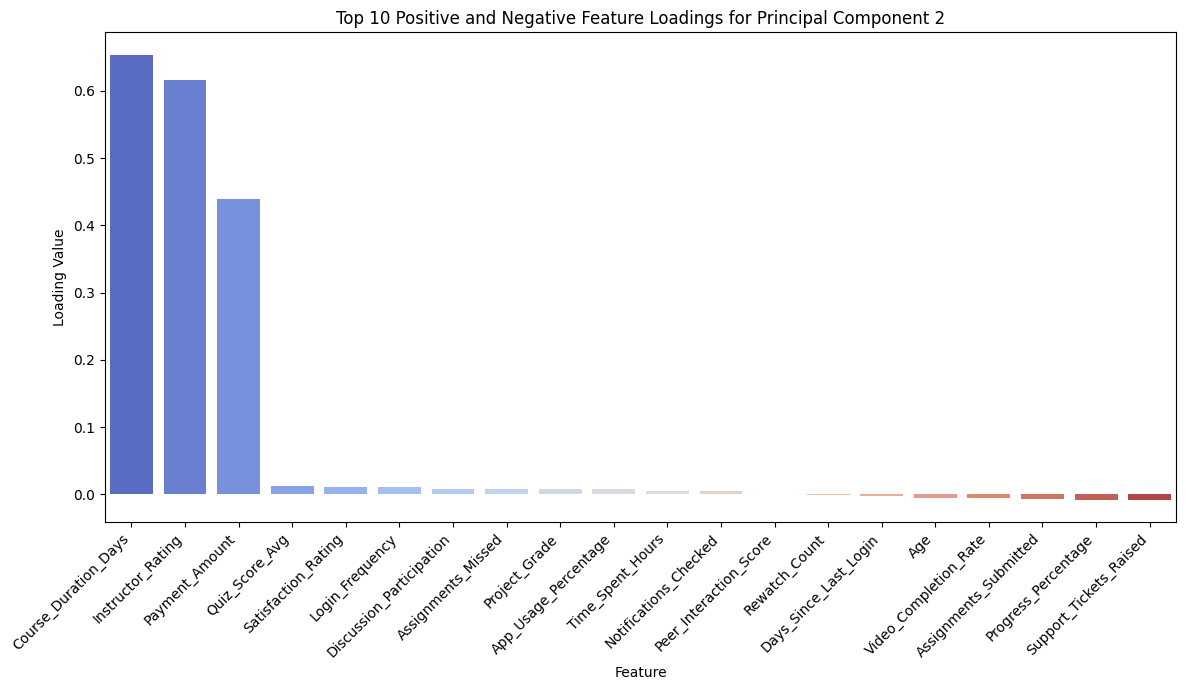

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort loadings for PC2
pc2_loadings_sorted = feature_loadings['PC2'].sort_values(ascending=False)

# Get top 10 positive and top 10 negative loadings for PC2
top_10_pos_pc2 = pc2_loadings_sorted.head(10)
top_10_neg_pc2 = pc2_loadings_sorted.tail(10)

# Combine for plotting
pc2_plot_data = pd.concat([top_10_pos_pc2, top_10_neg_pc2])

plt.figure(figsize=(12, 7))
sns.barplot(x=pc2_plot_data.index, y=pc2_plot_data.values, palette='coolwarm', legend=False)
plt.title('Top 10 Positive and Negative Feature Loadings for Principal Component 2')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

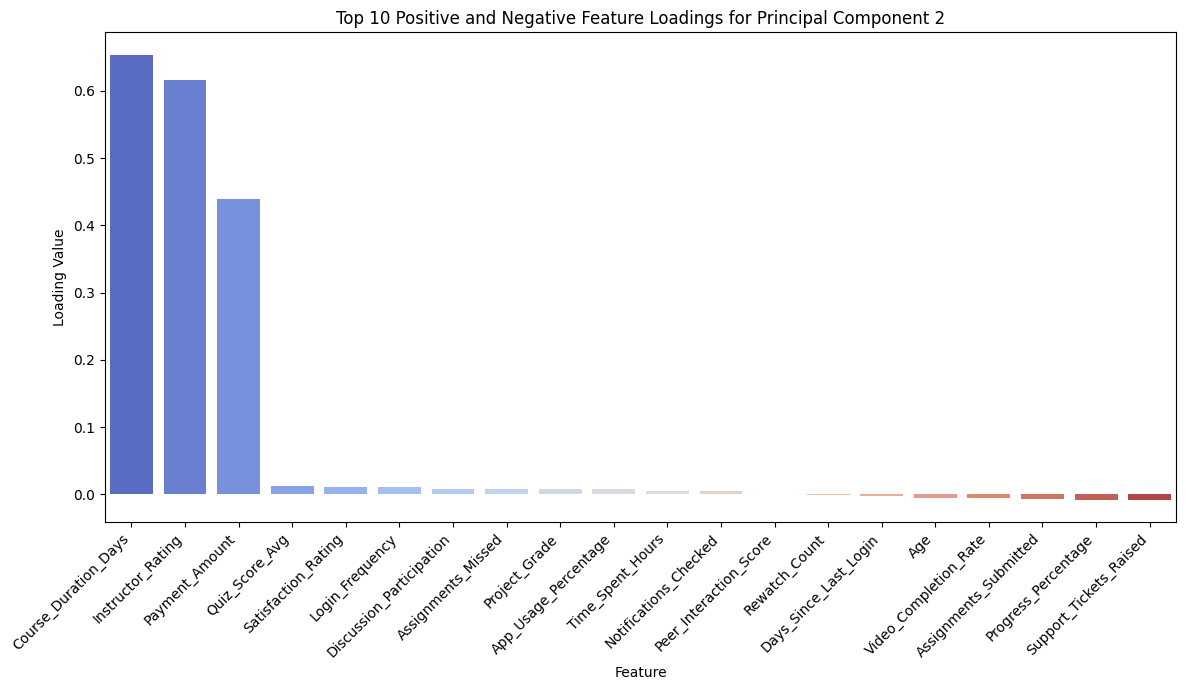

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort loadings for PC2
pc2_loadings_sorted = feature_loadings['PC2'].sort_values(ascending=False)

# Get top 10 positive and top 10 negative loadings for PC2
top_10_pos_pc2 = pc2_loadings_sorted.head(10)
top_10_neg_pc2 = pc2_loadings_sorted.tail(10)

# Combine for plotting
pc2_plot_data = pd.concat([top_10_pos_pc2, top_10_neg_pc2])

plt.figure(figsize=(12, 7))
sns.barplot(x=pc2_plot_data.index, y=pc2_plot_data.values, hue=pc2_plot_data.index, palette='coolwarm', legend=False)
plt.title('Top 10 Positive and Negative Feature Loadings for Principal Component 2')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Preprocessing

In [36]:
drop_cols = ["Student_ID", "Name", "Course_ID", "Course_Name", "Enrollment_Date","Completed"]
df = df.drop(columns=drop_cols)

In [37]:
df.head()

Gender  Age Education_Level Employment_Status     City Device_Type  \
0    Male   19         Diploma           Student   Indore      Laptop   
1  Female   17        Bachelor           Student    Delhi      Laptop   
2  Female   34          Master           Student  Chennai      Mobile   
3  Female   29         Diploma          Employed    Surat      Mobile   
4  Female   19          Master     Self-Employed  Lucknow      Laptop   

  Internet_Connection_Quality     Category  Course_Level  \
0                      Medium  Programming  Intermediate   
1                         Low  Programming      Advanced   
2                      Medium  Programming      Beginner   
3                        High       Design      Beginner   
4                      Medium  Programming      Advanced   

   Course_Duration_Days  Instructor_Rating  Login_Frequency  \
0                    60                4.7                3   
1                    90                4.6                4   
2                    45                4.6                5   
3                    40                4.4                2   
4                    90                4.6                2   

   Average_Session_Duration_Min  Video_Completion_Rate  \
0                            30                   55.0   
1                            37                   84.1   
2                             9                   75.6   
3                            27                   63.3   
4                            36                   86.4   

   Discussion_Participation  Time_Spent_Hours  Days_Since_Last_Login  \
0                         2               0.5                      1   
1                         2               0.9                      3   
2                         3               0.5                     19   
3                         1               7.4                     19   
4                         1               0.5                      4   

   Notifications_Checked  Peer_Interaction_Score  Assignments_Submitted  \
0                      6                     4.3                      8   
1                      5                     7.8                      4   
2                      5                     6.7                      8   
3                      9                     6.4                      0   
4                      7                     7.5                      5   

   Assignments_Missed  Quiz_Attempts  Quiz_Score_Avg  Project_Grade  \
0                   1              5            80.9           71.2   
1                   6              3            78.4           42.5   
2                   2              3           100.0           87.9   
3                  10              4            59.1           51.4   
4                   5              8            84.8           93.0   

   Progress_Percentage  Rewatch_Count Payment_Mode Fee_Paid Discount_Used  \
0                 70.8              0  Scholarship       No            No   
1                 55.6              2  Credit Card      Yes            No   
2                 78.8              2   NetBanking      Yes            No   
3                 24.7              4          UPI      Yes            No   
4                 64.9              4   Debit Card      Yes           Yes   

   Payment_Amount  App_Usage_Percentage  Reminder_Emails_Clicked  \
0            1740                    49                        3   
1            6147                    86                        0   
2            4280                    85                        1   
3            3812                    42                        2   
4            5486                    91                        3   

   Support_Tickets_Raised  Satisfaction_Rating  Completed_encoded  
0                       4                  3.5                  1  
1                       0                  4.5                  0  
2                       0                  5.0                  1  
3                   

In [38]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)
df['Fee_Paid'] = df['Fee_Paid'].apply(lambda x:1 if x == 'Yes' else 0)
df['Discount_Used'] = df['Discount_Used'].apply(lambda x:1 if x == 'Yes' else 0)

In [ ]:
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Completed_encoded")

# Encode categorical features
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

## RF Model And Results & Feature Importance


✂✨ Data Split Completed!
Training Data: (75000, 34)
Testing Data: (25000, 34)

✅ Model Training Completed!

☕✨ Model Performance:
Accuracy: 60.38 %

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.60     12743
           1       0.59      0.62      0.60     12257

    accuracy                           0.60     25000
   macro avg       0.60      0.60      0.60     25000
weighted avg       0.60      0.60      0.60     25000



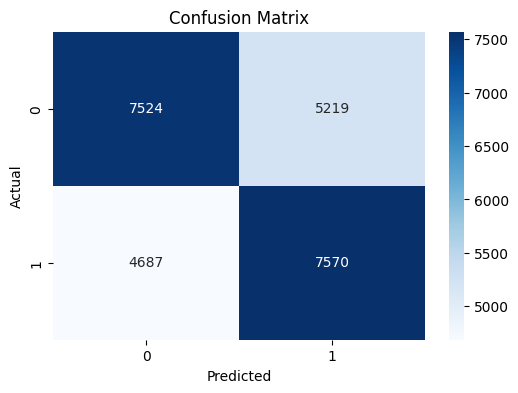

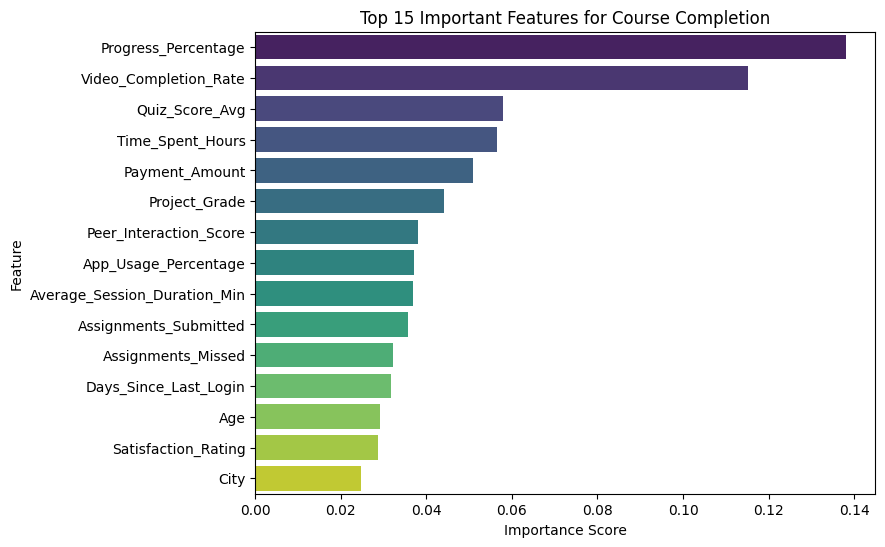


 ✨ Example Prediction:
Predicted: Completed


In [41]:
# Split Data
X = df.drop("Completed_encoded", axis=1)
y = df["Completed_encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("\n✂ Data Split Completed!")
print(f"Training Data: {X_train.shape}")
print(f"Testing Data: {X_test.shape}")


# Feature Scaling
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


# Model Training
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

model.fit(X_train, y_train)
print("\n Model Training Completed!")


# Model Evaluation
y_pred = model.predict(X_test)

print("\n☕ Model Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features, y=top_features.index, hue=top_features.index, palette="viridis", legend=False)
plt.title("Top 15 Important Features for Course Completion")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

sample = X_test.sample(1, random_state=42)
prediction = model.predict(sample)
print("\n  Example Prediction:")
print("Predicted:", "Completed" if prediction[0] == 1 else "Not Completed")

## Define Base Models for Stacking



In [42]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

print("XGBClassifier and CatBoostClassifier imported.")

XGBClassifier and CatBoostClassifier imported.


In [43]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42, class_weight='balanced', n_jobs=-1)
xgb_model = XGBClassifier(random_state=42, n_jobs=-1)
cat_model = CatBoostClassifier(random_state=42, verbose=0)

print("Base models initialized: rf_model, xgb_model, cat_model.")

Base models initialized: rf_model, xgb_model, cat_model.


## Define Meta-Model for Stacking


In [44]:
from sklearn.linear_model import LogisticRegression

print("LogisticRegression imported.")

LogisticRegression imported.


In [45]:
meta_model = LogisticRegression(random_state=42, n_jobs=-1)

print("Meta-model (LogisticRegression) initialized.")

Meta-model (LogisticRegression) initialized.


## Implement and Train Stacking Classifier


In [46]:
from sklearn.ensemble import StackingClassifier

print("StackingClassifier imported.")

StackingClassifier imported.


In [47]:
estimators = [
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('cat', cat_model)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    verbose=1
)

print("StackingClassifier instantiated. Training the model...")
stacking_model.fit(X_train, y_train)
print("StackingClassifier training completed!")

StackingClassifier instantiated. Training the model...
StackingClassifier training completed!


## Make Predictions with Ensemble Model


In [48]:
y_pred_stacked = stacking_model.predict(X_test)

print("Predictions generated using Stacking Classifier.")

Predictions generated using Stacking Classifier.


## Ensemble Model Report



☕ Stacking Classifier Performance:
Accuracy: 60.13 %

Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61     12743
           1       0.59      0.59      0.59     12257

    accuracy                           0.60     25000
   macro avg       0.60      0.60      0.60     25000
weighted avg       0.60      0.60      0.60     25000



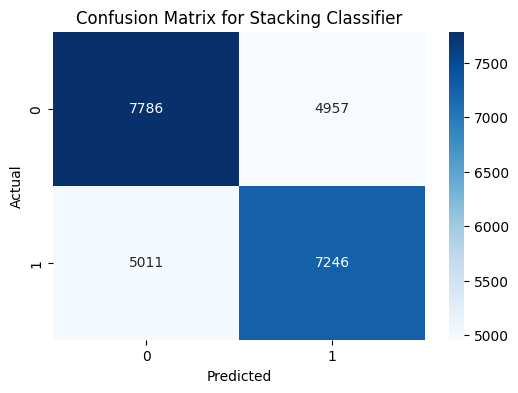

In [49]:
print("\n Stacking Classifier Performance:")
stacked_accuracy = accuracy_score(y_test, y_pred_stacked)
print(f"Accuracy: {stacked_accuracy*100:.2f} %")

print("\nClassification Report for Stacking Classifier:")
print(classification_report(y_test, y_pred_stacked))

# Confusion Matrix for Stacking Classifier
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_stacked), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Stacking Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Implement and Train VotingClassifier


In [50]:
from sklearn.ensemble import VotingClassifier

print("VotingClassifier imported.")

VotingClassifier imported.


In [51]:
estimators_voting = [
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('cat', cat_model)
]

voting_model = VotingClassifier(
    estimators=estimators_voting,
    voting='soft',
    n_jobs=-1,
    verbose=True
)

print("VotingClassifier instantiated. Training the model...")
voting_model.fit(X_train, y_train)
print("VotingClassifier training completed!")

VotingClassifier instantiated. Training the model...
VotingClassifier training completed!


## Make Predictions with VotingClassifier



In [52]:
y_pred_voting = voting_model.predict(X_test)

print("Predictions generated using VotingClassifier.")

Predictions generated using VotingClassifier.


## VotingClassifier Report




VotingClassifier Performance:
Accuracy: 59.73 %

Classification Report for VotingClassifier:
              precision    recall  f1-score   support

           0       0.61      0.60      0.60     12743
           1       0.59      0.59      0.59     12257

    accuracy                           0.60     25000
   macro avg       0.60      0.60      0.60     25000
weighted avg       0.60      0.60      0.60     25000



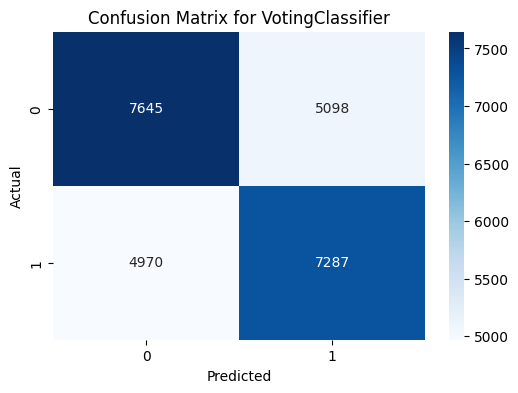

In [53]:
print("\nVotingClassifier Performance:")
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"Accuracy: {voting_accuracy*100:.2f} %")

print("\nClassification Report for VotingClassifier:")
print(classification_report(y_test, y_pred_voting))

# Confusion Matrix for VotingClassifier
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for VotingClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()